In [4]:
#Importing Data analysis and Visulization libraries and Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import dtale                          #D-Tale to show the data more sufficiently

#Loading the dataset
participants =pd.read_csv("D:/Participants.csv",encoding='latin1')
experiences =pd.read_csv("D:/Experiences.csv",encoding='latin1')       #encoding= 'latin1' , dataset use latin1 as reference because we will have UnicodeDecodeError: "utf-8" codec can"t decode error               
dtale.show(experiences)

In [2]:
#Dropping the "Staff level" , "Staff type" from the participants
participants.drop(["Staff level","Staff type"], axis =1 )
experiences.drop(["0"], axis =1 )

#Checking for missing data
experiences.isna().any()

Categories                 False
Created                    False
Description                 True
Experience ID              False
Participant ID             False
Sources                    False
Tag                         True
Workshop                   False
0                           True
Categories-Access          False
Categories-Career          False
Categories-Compensation    False
Categories-Interactions    False
Categories-Learning        False
Categories-Life            False
Categories-Recognition     False
Categories-Respect         False
Categories-Skills          False
Sources-Customers          False
Sources-HR                 False
Sources-Leadership         False
Sources-Manager            False
Sources-Peers              False
Sources-Policy             False
Sources-Reports            False
dtype: bool

In [3]:
#Connecting the two Datasets together 
combined_file = pd.merge(participants, experiences,
                 on='Participant ID', how='left')

#Dropping the empty row in 
combined_file.dropna(subset = ["Description"], inplace=True)

#Adding the new columns to the dataset 
combined_file['Number of words'] = combined_file["Description"].apply(lambda x: len(x.split()))

dtale.show(combined_file)

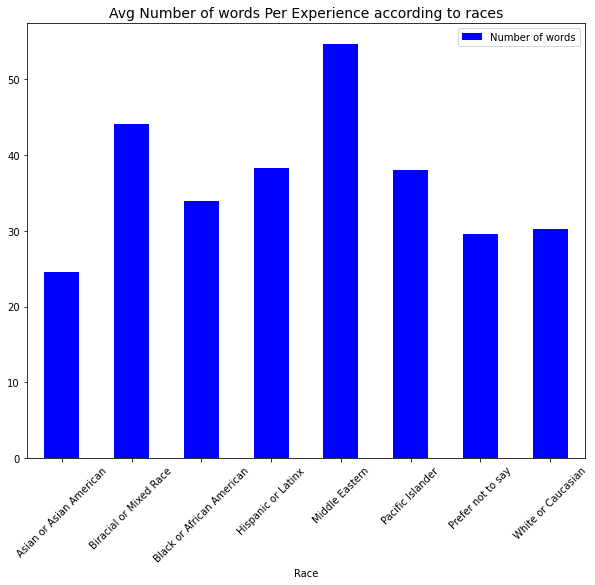

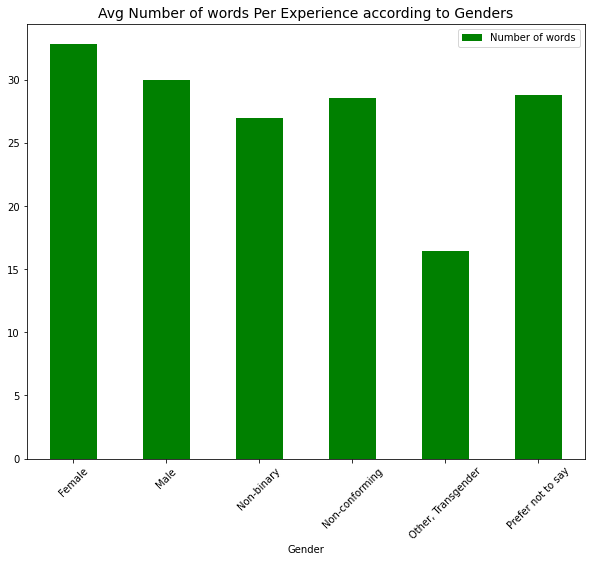

In [5]:
#Races'average number of words per review
combined_file2 = combined_file.copy(deep=True)
combined_file2.loc[(combined_file2.Race == "Native Hawaiian or Pacific Islander/ Pacific Islander"),'Race']= "Pacific Islander"
                                   #Change the name of to make it easier to fit in the graph
NumWords_Races = combined_file2.groupby('Race').agg({'Number of words':'mean'})
NumWords_Races.plot.bar(figsize=(10,8), color ='b', width= 0.5, rot=45)
plt.title('Avg Number of words Per Experience according to races', fontsize=14)
plt.show()


#Genders' average number of words per review  
NumWords_Races = combined_file2.groupby('Gender').agg({'Number of words':'mean'})
NumWords_Races.plot.bar(figsize=(10,8), color ='g', width= 0.5, rot=45)
plt.title('Avg Number of words Per Experience according to Genders', fontsize=14)
plt.show()


#Ages' average number of words per review 


#Industries' average number of words per review 


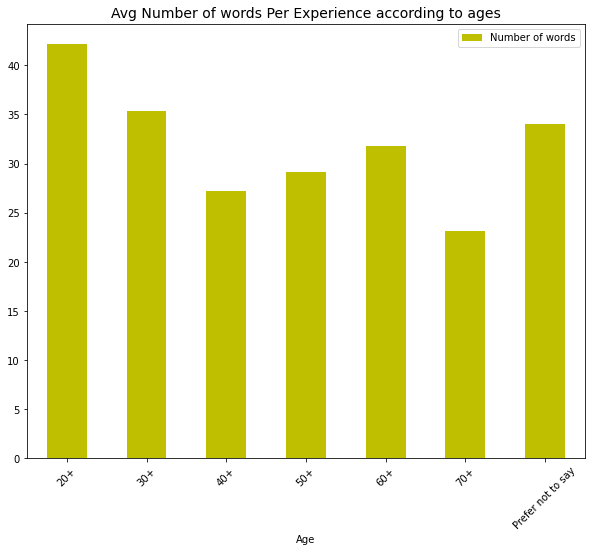

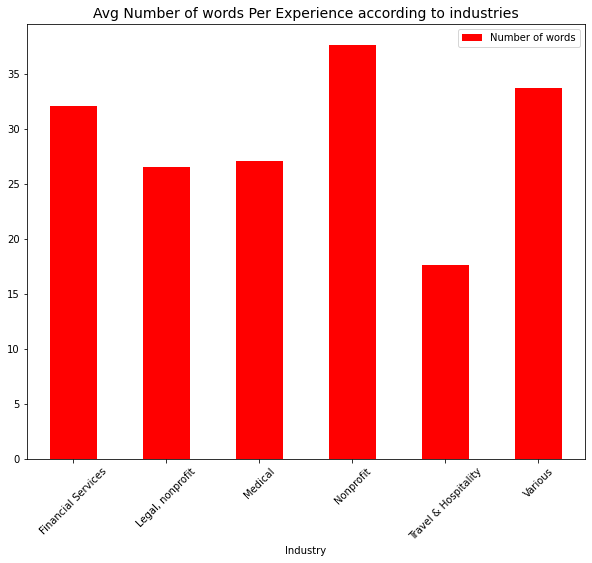

In [6]:
#Ages' average number of words per review 
NumWords_Races = combined_file2.groupby('Age').agg({'Number of words':'mean'})
NumWords_Races.plot.bar(figsize=(10,8), color ='y', width= 0.5, rot=45)
plt.title('Avg Number of words Per Experience according to ages', fontsize=14)
plt.show()


#Industries' average number of words per review 
NumWords_Races = combined_file2.groupby('Industry').agg({'Number of words':'mean'})
NumWords_Races.plot.bar(figsize=(10,8), color ='r', width= 0.5, rot=45)
plt.title('Avg Number of words Per Experience according to industries', fontsize=14)
plt.show()


##  What are common experiences of exclusion within x industry?

In [7]:
#Natural Language processing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [8]:
#Print comment with numbers and windows line break
combined_file.Description.values[1]

'I am in an interracial relationship and the head of our organization told me in a performance review that my partner and I should explore why we married one another.'

In [9]:
#Preprocessing of the description 

combined_file = combined_file[combined_file['Description'].notnull()]
                                        #Take out empty comments
combined_file['Description'] = combined_file['Description'].str.replace('\d+','')
                                        #remove numbers 
combined_file['Description'] = combined_file['Description'].str.lower()
                                        #lowercase
combined_file['Description'] = combined_file['Description'].str.replace('\r\n',"")
                                        #remove windows new line
stop_english=stopwords.words("english")
combined_file['Description'] = combined_file['Description'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
                                        #remove all the stop words with nltk library
combined_file['Description'] = combined_file['Description'].str.replace('[^\w\s]'," ")
                                        #remove all punctuation
combined_file['Description'] = combined_file['Description'].str.replace('\s+', ' ')
                                        #replace x spaces by one space 


    
combined_file.Description.values[1]           #print the comment index0 one more time

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning:

The default value of regex will change from True to False in a future version.



'interracial relationship head organization told performance review partner explore married one another '

Executing shutdown due to inactivity...


2021-06-18 02:13:22,207 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-06-18 02:13:26,300 - INFO     - Executing shutdown...


In [9]:
#Function: Top 10 common words in the comments with CountVectorizer()
def commonwords(worddataframe): 
    texts= worddataframe.tolist()

    vec = CountVectorizer().fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
    return cvec_df.head(10)


#Function:Word cloud from the file we have 
def wordcloud(worddataframe): 
    texts= worddataframe.tolist()

    vec = CountVectorizer().fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
    cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

    wordcloud = WordCloud(width=800, height=400)
    wordcloud.generate_from_frequencies(frequencies=cvec_dict)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [10]:
#Get the list of unique industries 
unique_industry = combined_file.Industry.unique().tolist()

#Print the 10 common words out for each industry 
from IPython.display import display
for i in unique_industry: 
    print("Industry: ", i)
    display(commonwords(combined_file.Description[combined_file["Industry"] == i]))

Industry:  Various


words  counts
13     work      29
8     asked      15
16     told      15
6      time      14
67  company      13
50  manager      13
37    would      13
22      one      12
43     feel      11
34     team      11

Industry:  Legal, nonprofit


words  counts
5          male      31
100        work      26
150        feel      15
2       meeting      14
10        often      13
149        like      13
14        white      13
56      company      11
175  experience      10
23     attorney       9

Industry:  Medical


words  counts
25           job       4
38          felt       3
103         told       3
74          work       3
4    compensated       3
47      meetings       3
12       meeting       3
33           two       2
91       outside       2
58       working       2

Industry:  Travel & Hospitality


words  counts
95       work      15
2    meetings      10
5       often      10
122      team      10
0         get       9
13       male       9
116     asked       8
32       told       8
18     people       7
254     given       7

Industry:  Financial Services


words  counts
171        male     136
5          work     135
16      company     123
234     manager     120
29         feel     106
302  management      90
60   experience      84
339        team      82
82     meetings      81
73       people      74

Industry:  Nonprofit


words  counts
10          staff     101
49           feel      86
5            club      84
69           time      83
34           work      74
82   organization      54
427           job      40
90           like      39
73     leadership      36
19            new      32

Industry:  Various


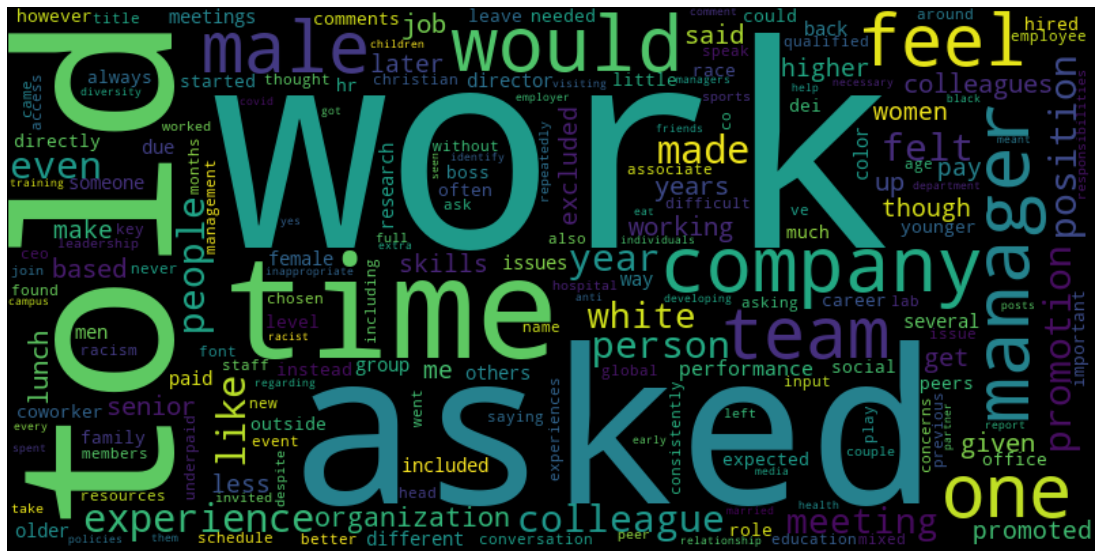

None

Industry:  Legal, nonprofit


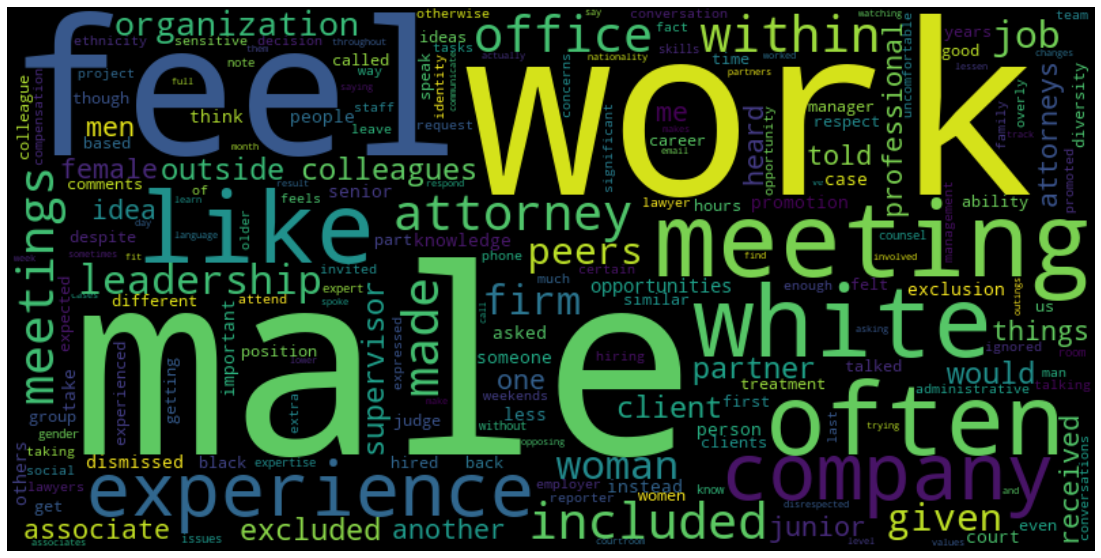

None

Industry:  Medical


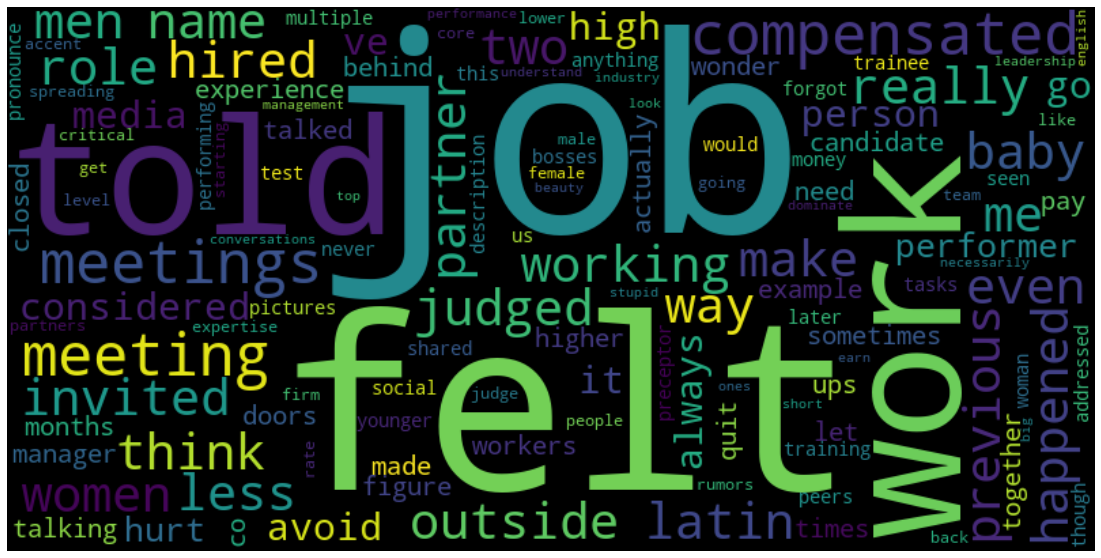

None

Industry:  Travel & Hospitality


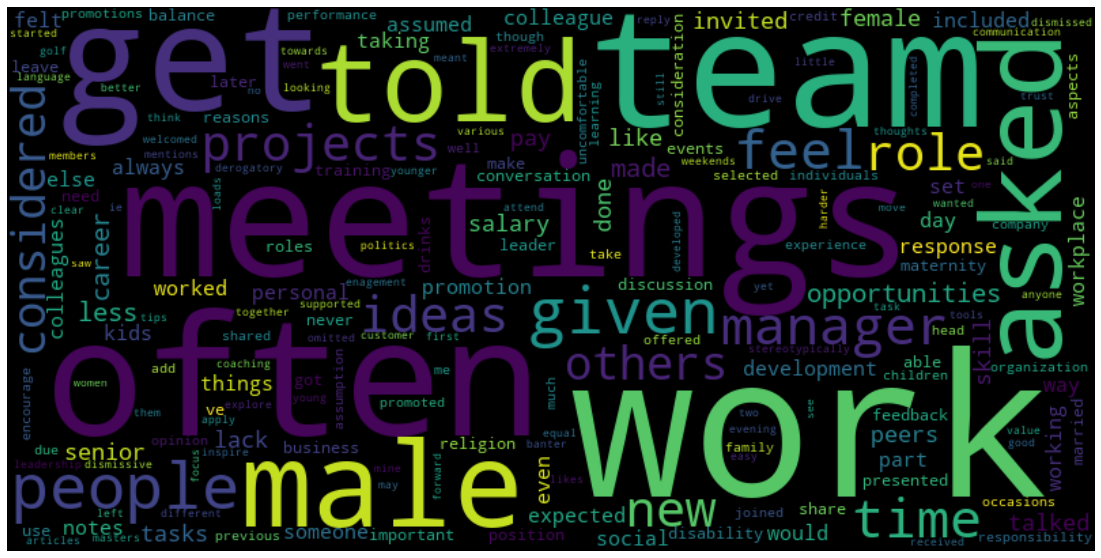

None

Industry:  Financial Services


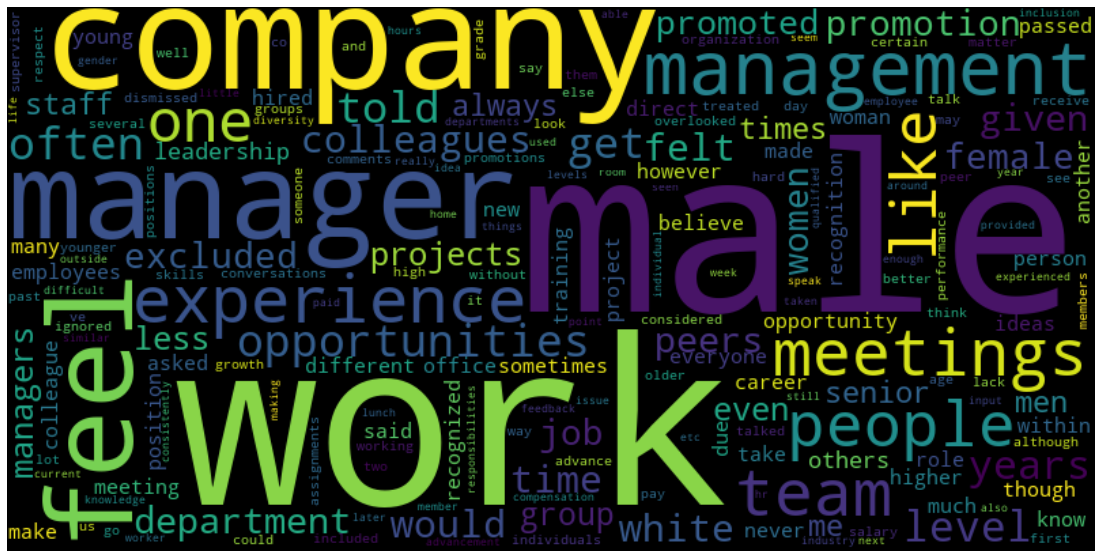

None

Industry:  Nonprofit


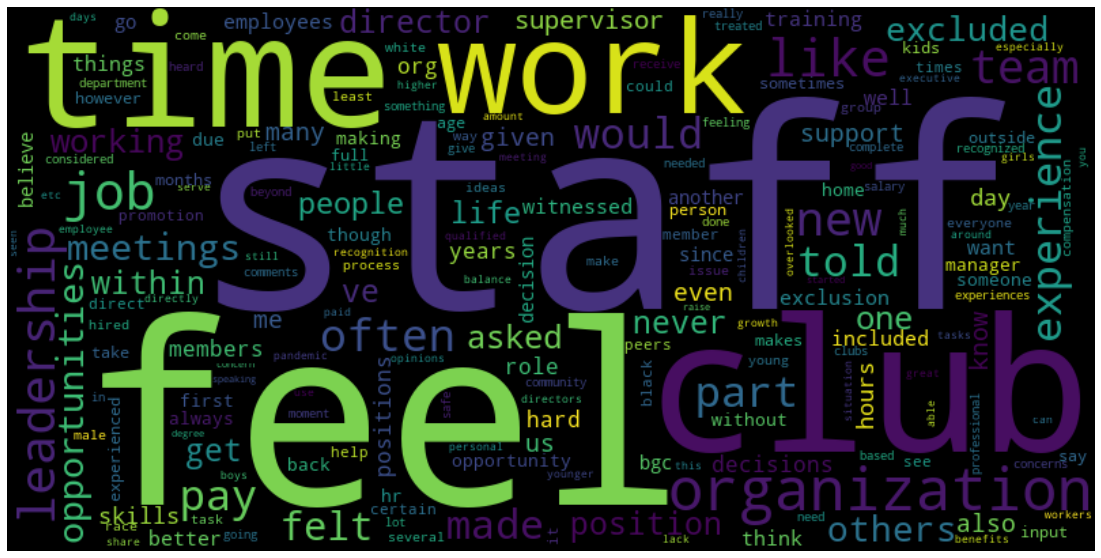

None

In [11]:
#Print wordcloud for each industry 
from IPython.display import display
for i in unique_industry: 
    print("Industry: ", i)
    display(wordcloud(combined_file.Description[combined_file["Industry"] == i]))

##  What are common experiences of exclusion that occur within companies of various sizes? Do we find that as an organization is growing, or at a certain size, that certain types of behaviors or experiences are more common?


In [12]:
#Get the list of unique sizes
organization_size = combined_file["Organization size"].unique().tolist()

#Print the 10 common words out for each industry 
from IPython.display import display
for i in organization_size: 
    print("Industry: ", i)
    display(commonwords(combined_file.Description[combined_file["Organization size"] == i]))

Industry:  Missing


words  counts
13      work      47
16      told      26
8      asked      23
34      team      22
50   manager      21
6       time      21
29      male      21
61  meetings      18
43      feel      18
37     would      17

Industry:  Large


words  counts
5          male      31
100        work      26
150        feel      15
2       meeting      14
10        often      13
149        like      13
14        white      13
56      company      11
175  experience      10
23     attorney       9

Industry:  Medium


words  counts
171        male     136
5          work     135
16      company     123
234     manager     120
29         feel     106
302  management      90
60   experience      84
339        team      82
82     meetings      81
73       people      74

Industry:  Small


words  counts
10          staff     101
49           feel      86
5            club      84
69           time      83
34           work      74
82   organization      54
427           job      40
90           like      39
73     leadership      36
19            new      32

Industry:  Missing


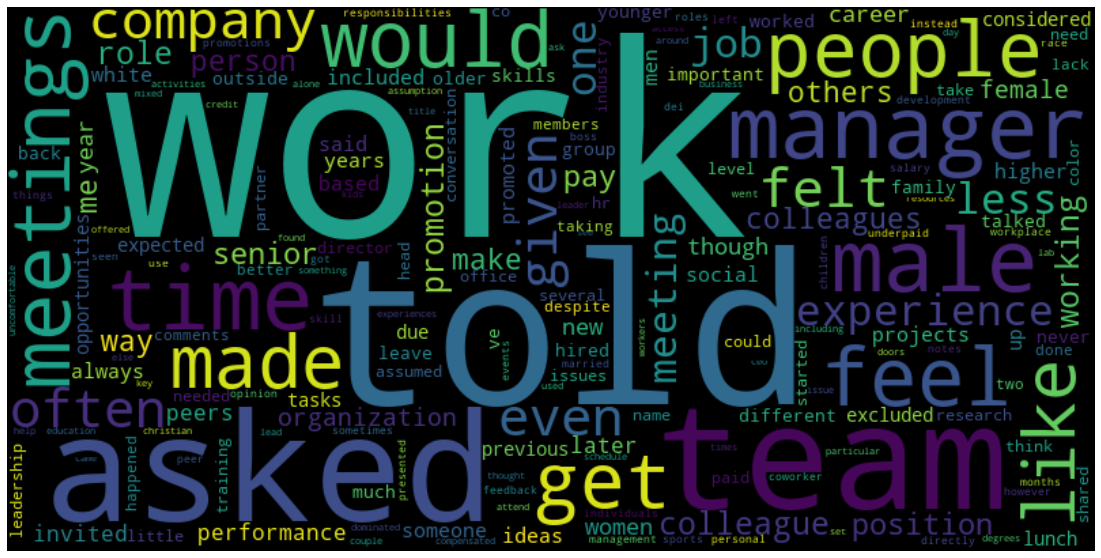

None

Industry:  Large


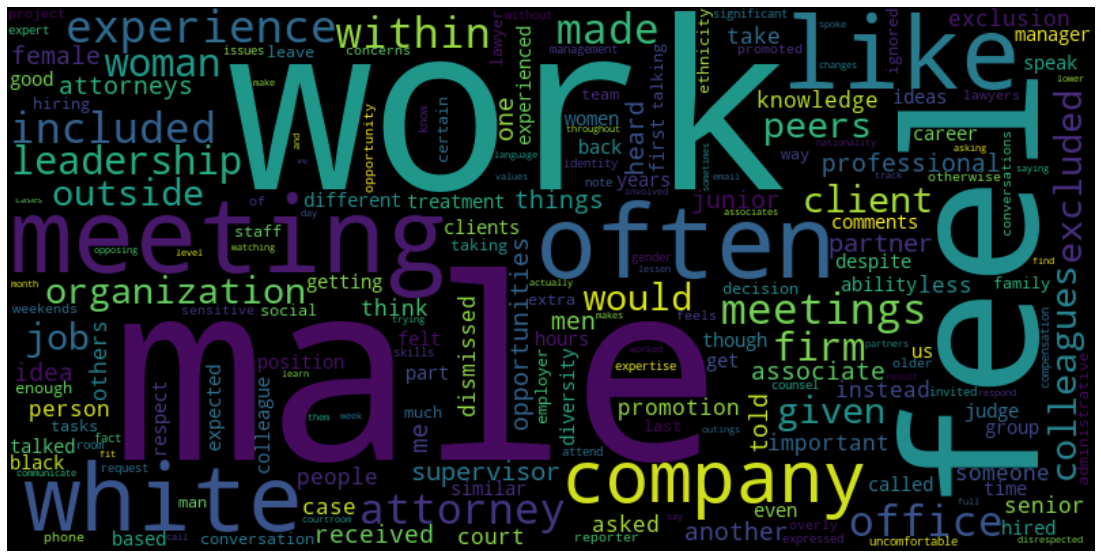

None

Industry:  Medium


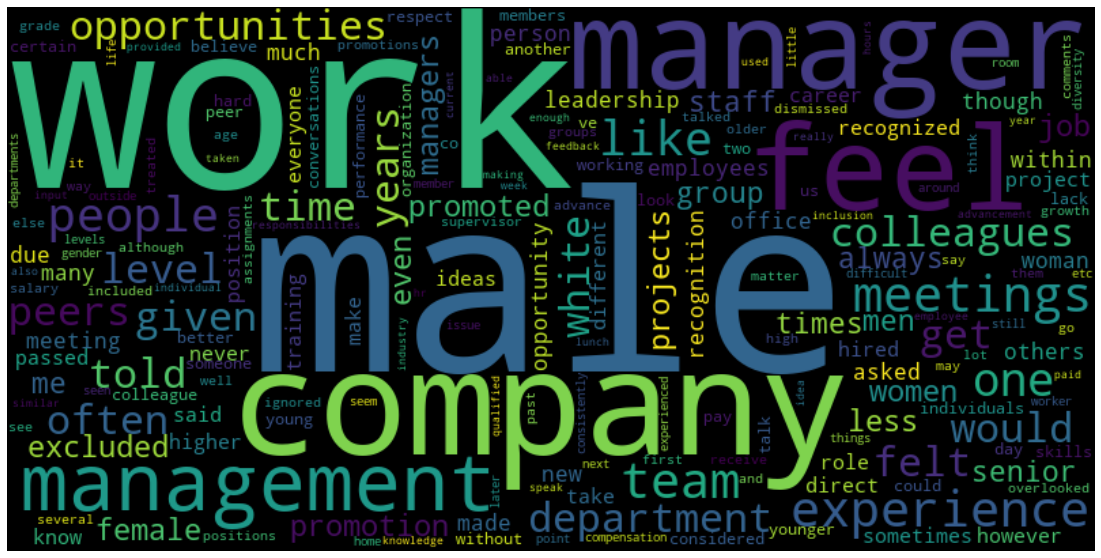

None

Industry:  Small


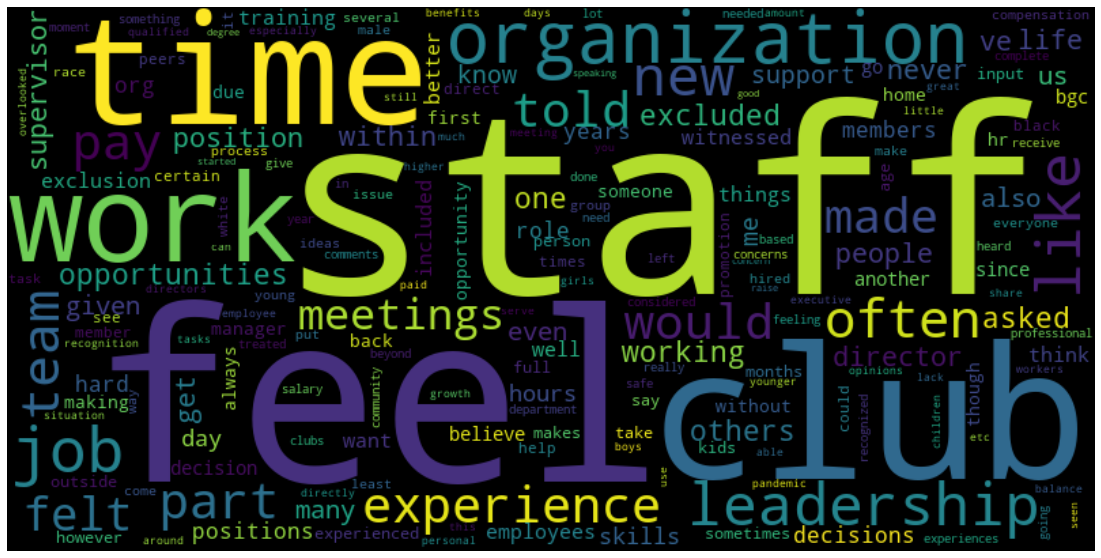

None

In [13]:
#Print wordcloud for each industry 
from IPython.display import display
for i in organization_size: 
    print("Industry: ", i)
    display(wordcloud(combined_file.Description[combined_file["Organization size"] == i]))

## What are the most common experiences of exclusion within each category? (would require analysis of words)


We will use **Latent_Dirichlet_Allocation**  technique through [gensim](https://pypi.org/project/gensim/) according to this research [link](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24#:~:text=Topic%20modeling%20is%20a%20type,document%20to%20a%20particular%20topic.) (Please recreate it again here to make sure u get the most correct version) 

In [14]:
#Get the original combined files before we change anything
combined_file = pd.merge(participants, experiences,
                 on='Participant ID', how='left')
combined_file.dropna(subset = ["Description"], inplace=True)
combined_file['Number of words'] = combined_file["Description"].apply(lambda x: len(x.split()))

In [15]:
Cat_access = pd.DataFrame(combined_file.Description[combined_file["Categories-Access"] == 1])
Cat_career = pd.DataFrame(combined_file.Description[combined_file["Categories-Career"] == 1])
Cat_compensation = pd.DataFrame(combined_file.Description[combined_file["Categories-Compensation"] == 1])
Cat_interactions = pd.DataFrame(combined_file.Description[combined_file["Categories-Interactions"] == 1])
Cat_learning = pd.DataFrame(combined_file.Description[combined_file["Categories-Learning"] == 1])
Cat_life = pd.DataFrame(combined_file.Description[combined_file["Categories-Life"] == 1])
Cat_recognition = pd.DataFrame(combined_file.Description[combined_file["Categories-Recognition"] == 1])
Cat_respect = pd.DataFrame(combined_file.Description[combined_file["Categories-Respect"] == 1])
Cat_skills = pd.DataFrame(combined_file.Description[combined_file["Categories-Skills"] == 1])
categories_list= [Cat_access , Cat_career, Cat_compensation, Cat_interactions, Cat_learning, Cat_life, Cat_recognition, Cat_respect, Cat_skills] 
                                              #Put them in the list together like this for it is easier to push through the function

categories_list

[                                            Description
 13    I am mostly seen as a woman first and an attor...
 14    I was asked to get more coffee for the boardro...
 15    As part of my privilege as a cisgender male, I...
 17    Entered a meeting as the only woman with a roo...
 18    At an offsite meeting at our ex-US headquarter...
 ...                                                 ...
 1607  People ask others what I would like to have / ...
 1610  The health care coverage offered by the compan...
 1616  Not being asked to participate in a Board disc...
 1617  Hiring decisions for our team were made withou...
 1621  I worked in corporate America for 12 years. I ...
 
 [363 rows x 1 columns],
                                             Description
 7     I used to work for in hospitality, the company...
 21    My male supervisor only mentors male attorneys...
 26    Promotion processes have been changed, on mult...
 47                         Not looked at for promotions
 48 

In [16]:
#Import the necessary packages for this part 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS      

import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.stem.porter import *
np.random.seed(2018)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
#Lemmatize function
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Stem Preprocessing function
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [18]:
#Adding the index column into the list's dataframes
categories_list_with_index = []
for data in categories_list:
    data_text = data[['Description']]
    data_text['index'] = data_text.index
    categories_list_with_index.append(data_text)

categories_list_with_index[0]

Description  index
13    I am mostly seen as a woman first and an attor...     13
14    I was asked to get more coffee for the boardro...     14
15    As part of my privilege as a cisgender male, I...     15
17    Entered a meeting as the only woman with a roo...     17
18    At an offsite meeting at our ex-US headquarter...     18
...                                                 ...    ...
1607  People ask others what I would like to have / ...   1607
1610  The health care coverage offered by the compan...   1610
1616  Not being asked to participate in a Board disc...   1616
1617  Hiring decisions for our team were made withou...   1617
1621  I worked in corporate America for 12 years. I ...   1621

[363 rows x 2 columns]

In [47]:
categories_list_with_index[8].to_csv('file_name.csv')

In [19]:
#Preprocess the Description text, saving the results as ‘processed_docs’
processed_docs_list = []
for documents in categories_list_with_index:
    processed_docs = documents['Description'].map(preprocess)
    processed_docs_list.append(processed_docs)

processed_docs_list[0]

13                         [see, woman, attorney, second]
14      [ask, coffe, boardroom, activ, contribut, part...
15      [privileg, cisgend, male, recogn, experi, excl...
17           [enter, meet, woman, room, acknowledg, meet]
18      [offsit, meet, headquart, woman, even, activ, ...
                              ...                        
1607                                 [peopl, like, right]
1610    [health, care, coverag, offer, compani, includ...
1616    [ask, particip, board, discuss, report, submit...
1617    [hire, decis, team, input, partial, respons, h...
1621    [work, corpor, america, year, quick, promot, l...
Name: Description, Length: 363, dtype: object

### BAG OF WORDS approach

In [20]:
#Creating the function for the Bag of Words approach
def LDA_Bags_Of_Words(processed_docs):
    #Create a dictionary (corpora) from ‘processed_docs’ containing the number of times a word appears in the training set.
    dictionary = gensim.corpora.Dictionary(processed_docs)

    #Gensim doc2bow
    #For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


    ### RUNNING LDA USING BAGS OF WORDS 
    # Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)
                                    #num_topics: Specifying how many topics that we will have
                                    #id2word:  Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
                                    #passes: Number of passes through the corpus during training.
                                    #workers: Number of workers processes to be used for parallelization
    #For each topic, we will explore the words occuring in that topic and its relative weight.
    for idx, topic in lda_model.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(idx, topic))

In [21]:
#Looping through Categories values 
for i in range(9):
    LDA_Bags_Of_Words(processed_docs_list[i])

2021-06-02 22:38:34,407 - INFO     - adding document #0 to Dictionary(0 unique tokens: [])
2021-06-02 22:38:34,448 - INFO     - built Dictionary(1081 unique tokens: ['attorney', 'second', 'see', 'woman', 'activ']...) from 363 documents (total 4288 corpus positions)
2021-06-02 22:38:34,460 - INFO     - using symmetric alpha at 0.2
2021-06-02 22:38:34,468 - INFO     - using symmetric eta at 0.2
2021-06-02 22:38:34,468 - INFO     - using serial LDA version on this node
2021-06-02 22:38:34,507 - INFO     - running online LDA training, 5 topics, 10 passes over the supplied corpus of 363 documents, updating every 4000 documents, evaluating every ~363 documents, iterating 50x with a convergence threshold of 0.001000
2021-06-02 22:38:34,512 - INFO     - training LDA model using 2 processes
2021-06-02 22:38:34,603 - INFO     - PROGRESS: pass 0, dispatched chunk #0 = documents up to #363/363, outstanding queue size 1
2021-06-02 22:38:37,383 - INFO     - topic #0 (0.200): 0.027*"manag" + 0.023*"f

Topic: 0 
Words: 0.027*"manag" + 0.025*"feel" + 0.019*"work" + 0.015*"staff" + 0.013*"time" + 0.012*"club" + 0.011*"employe" + 0.011*"experi" + 0.010*"opportun" + 0.009*"role"
Topic: 1 
Words: 0.019*"depart" + 0.017*"project" + 0.011*"work" + 0.010*"male" + 0.010*"decis" + 0.009*"colleagu" + 0.009*"team" + 0.009*"tell" + 0.009*"women" + 0.009*"dismiss"
Topic: 2 
Words: 0.034*"manag" + 0.031*"meet" + 0.020*"experi" + 0.015*"particip" + 0.015*"opportun" + 0.013*"exclud" + 0.012*"give" + 0.011*"exclus" + 0.010*"tell" + 0.010*"senior"
Topic: 3 
Words: 0.026*"meet" + 0.023*"project" + 0.014*"male" + 0.012*"idea" + 0.010*"white" + 0.010*"direct" + 0.010*"speak" + 0.010*"inform" + 0.009*"share" + 0.009*"skill"
Topic: 4 
Words: 0.019*"work" + 0.018*"male" + 0.013*"meet" + 0.013*"team" + 0.012*"opportun" + 0.012*"feel" + 0.012*"felt" + 0.010*"colleagu" + 0.010*"convers" + 0.010*"includ"


2021-06-02 22:38:44,248 - INFO     - topic #0 (0.200): 0.025*"promot" + 0.021*"manag" + 0.016*"male" + 0.014*"work" + 0.014*"time" + 0.013*"feel" + 0.012*"tell" + 0.011*"compani" + 0.010*"femal" + 0.009*"white"
2021-06-02 22:38:44,248 - INFO     - topic #1 (0.200): 0.022*"manag" + 0.020*"promot" + 0.019*"experi" + 0.018*"opportun" + 0.017*"feel" + 0.016*"work" + 0.012*"male" + 0.011*"year" + 0.011*"like" + 0.010*"leadership"
2021-06-02 22:38:44,248 - INFO     - topic #2 (0.200): 0.029*"opportun" + 0.029*"promot" + 0.016*"work" + 0.015*"posit" + 0.014*"exclud" + 0.013*"manag" + 0.013*"time" + 0.010*"felt" + 0.010*"meet" + 0.010*"advanc"
2021-06-02 22:38:44,256 - INFO     - topic #3 (0.200): 0.016*"opportun" + 0.015*"level" + 0.014*"promot" + 0.014*"experi" + 0.014*"posit" + 0.013*"work" + 0.012*"feel" + 0.011*"educ" + 0.010*"male" + 0.010*"peopl"
2021-06-02 22:38:44,256 - INFO     - topic #4 (0.200): 0.030*"manag" + 0.029*"promot" + 0.025*"compani" + 0.018*"work" + 0.014*"experi" + 0.01

Topic: 0 
Words: 0.027*"promot" + 0.018*"male" + 0.017*"manag" + 0.016*"work" + 0.014*"time" + 0.012*"team" + 0.012*"feel" + 0.012*"tell" + 0.012*"femal" + 0.011*"compani"
Topic: 1 
Words: 0.022*"opportun" + 0.021*"promot" + 0.021*"manag" + 0.019*"experi" + 0.016*"feel" + 0.016*"work" + 0.013*"hire" + 0.013*"male" + 0.012*"year" + 0.011*"posit"
Topic: 2 
Words: 0.032*"opportun" + 0.029*"promot" + 0.020*"work" + 0.016*"manag" + 0.013*"exclud" + 0.013*"posit" + 0.013*"advanc" + 0.012*"time" + 0.011*"meet" + 0.010*"felt"
Topic: 3 
Words: 0.019*"promot" + 0.019*"work" + 0.019*"level" + 0.018*"posit" + 0.017*"experi" + 0.015*"peopl" + 0.013*"higher" + 0.012*"feel" + 0.012*"educ" + 0.010*"opportun"
Topic: 4 
Words: 0.035*"manag" + 0.023*"promot" + 0.022*"compani" + 0.014*"experi" + 0.013*"time" + 0.013*"tell" + 0.012*"role" + 0.011*"give" + 0.010*"work" + 0.009*"like"


2021-06-02 22:38:51,378 - INFO     - topic #0 (0.200): 0.022*"experi" + 0.020*"work" + 0.018*"salari" + 0.015*"manag" + 0.012*"opportun" + 0.012*"peer" + 0.012*"pay" + 0.011*"compani" + 0.011*"promot" + 0.010*"time"
2021-06-02 22:38:51,379 - INFO     - topic #1 (0.200): 0.016*"level" + 0.016*"compens" + 0.016*"work" + 0.015*"peer" + 0.015*"hire" + 0.013*"perform" + 0.011*"promot" + 0.010*"compani" + 0.009*"degre" + 0.009*"think"
2021-06-02 22:38:51,379 - INFO     - topic #2 (0.200): 0.025*"work" + 0.023*"time" + 0.018*"promot" + 0.018*"compens" + 0.017*"staff" + 0.017*"feel" + 0.014*"manag" + 0.011*"opportun" + 0.010*"hire" + 0.009*"employe"
2021-06-02 22:38:51,387 - INFO     - topic #3 (0.200): 0.021*"work" + 0.018*"experi" + 0.014*"feel" + 0.014*"time" + 0.013*"year" + 0.012*"compens" + 0.011*"male" + 0.010*"month" + 0.009*"salari" + 0.009*"pay"
2021-06-02 22:38:51,387 - INFO     - topic #4 (0.200): 0.032*"promot" + 0.024*"work" + 0.022*"manag" + 0.018*"year" + 0.015*"feel" + 0.013*"

Topic: 0 
Words: 0.023*"salari" + 0.021*"work" + 0.020*"experi" + 0.017*"manag" + 0.013*"promot" + 0.013*"compani" + 0.013*"hire" + 0.012*"opportun" + 0.010*"move" + 0.010*"pay"
Topic: 1 
Words: 0.020*"peer" + 0.017*"perform" + 0.017*"compens" + 0.016*"level" + 0.016*"work" + 0.012*"hire" + 0.012*"degre" + 0.012*"rat" + 0.012*"male" + 0.010*"higher"
Topic: 2 
Words: 0.029*"time" + 0.028*"work" + 0.024*"staff" + 0.018*"feel" + 0.017*"compens" + 0.015*"promot" + 0.013*"manag" + 0.012*"opportun" + 0.011*"team" + 0.011*"club"
Topic: 3 
Words: 0.021*"work" + 0.021*"experi" + 0.016*"year" + 0.015*"feel" + 0.013*"month" + 0.013*"male" + 0.013*"compens" + 0.012*"pay" + 0.011*"believ" + 0.010*"peer"
Topic: 4 
Words: 0.041*"promot" + 0.026*"manag" + 0.020*"year" + 0.020*"work" + 0.015*"feel" + 0.015*"give" + 0.014*"tell" + 0.013*"experi" + 0.011*"male" + 0.011*"level"


2021-06-02 22:38:56,452 - INFO     - topic #0 (0.200): 0.026*"manag" + 0.016*"feel" + 0.015*"tell" + 0.010*"team" + 0.009*"time" + 0.009*"talk" + 0.008*"like" + 0.008*"member" + 0.007*"meet" + 0.007*"speak"
2021-06-02 22:38:56,452 - INFO     - topic #1 (0.200): 0.018*"feel" + 0.015*"manag" + 0.014*"group" + 0.014*"experi" + 0.013*"meet" + 0.013*"male" + 0.013*"talk" + 0.012*"exclud" + 0.010*"work" + 0.009*"peer"
2021-06-02 22:38:56,452 - INFO     - topic #2 (0.200): 0.019*"work" + 0.017*"peer" + 0.012*"feel" + 0.010*"member" + 0.010*"time" + 0.010*"interact" + 0.007*"share" + 0.007*"group" + 0.007*"meet" + 0.007*"like"
2021-06-02 22:38:56,461 - INFO     - topic #3 (0.200): 0.021*"meet" + 0.015*"manag" + 0.015*"work" + 0.011*"tell" + 0.010*"ask" + 0.009*"report" + 0.008*"staff" + 0.007*"director" + 0.007*"feel" + 0.007*"peopl"
2021-06-02 22:38:56,461 - INFO     - topic #4 (0.200): 0.023*"male" + 0.020*"work" + 0.015*"team" + 0.011*"staff" + 0.010*"colleagu" + 0.009*"includ" + 0.009*"tim

Topic: 0 
Words: 0.028*"manag" + 0.016*"feel" + 0.015*"tell" + 0.014*"team" + 0.010*"member" + 0.009*"supervisor" + 0.007*"like" + 0.007*"chang" + 0.007*"time" + 0.006*"opportun"
Topic: 1 
Words: 0.018*"feel" + 0.017*"talk" + 0.017*"manag" + 0.016*"male" + 0.015*"group" + 0.014*"meet" + 0.013*"experi" + 0.012*"peer" + 0.012*"exclud" + 0.010*"women"
Topic: 2 
Words: 0.022*"work" + 0.016*"peer" + 0.012*"share" + 0.011*"time" + 0.011*"interact" + 0.010*"feel" + 0.010*"member" + 0.009*"group" + 0.008*"committe" + 0.008*"email"
Topic: 3 
Words: 0.023*"meet" + 0.016*"manag" + 0.015*"work" + 0.011*"tell" + 0.011*"ask" + 0.010*"report" + 0.010*"director" + 0.009*"feel" + 0.009*"staff" + 0.008*"time"
Topic: 4 
Words: 0.022*"male" + 0.020*"work" + 0.015*"team" + 0.014*"staff" + 0.012*"project" + 0.011*"white" + 0.010*"time" + 0.010*"includ" + 0.009*"colleagu" + 0.009*"meet"


2021-06-02 22:39:04,145 - INFO     - topic #0 (0.200): 0.041*"opportun" + 0.019*"staff" + 0.014*"project" + 0.014*"manag" + 0.013*"promot" + 0.013*"work" + 0.012*"growth" + 0.010*"select" + 0.009*"organ" + 0.009*"posit"
2021-06-02 22:39:04,145 - INFO     - topic #1 (0.200): 0.018*"posit" + 0.016*"promot" + 0.016*"peer" + 0.015*"opportun" + 0.013*"give" + 0.011*"leadership" + 0.010*"manag" + 0.010*"time" + 0.009*"male" + 0.009*"develop"
2021-06-02 22:39:04,145 - INFO     - topic #2 (0.200): 0.030*"experi" + 0.021*"opportun" + 0.014*"posit" + 0.014*"work" + 0.012*"time" + 0.011*"year" + 0.011*"promot" + 0.011*"appli" + 0.011*"manag" + 0.010*"director"
2021-06-02 22:39:04,154 - INFO     - topic #3 (0.200): 0.027*"manag" + 0.018*"experi" + 0.015*"feel" + 0.014*"time" + 0.013*"compani" + 0.013*"promot" + 0.012*"meet" + 0.012*"train" + 0.011*"work" + 0.010*"peopl"
2021-06-02 22:39:04,154 - INFO     - topic #4 (0.200): 0.025*"manag" + 0.017*"project" + 0.016*"promot" + 0.015*"opportun" + 0.01

Topic: 0 
Words: 0.045*"opportun" + 0.019*"staff" + 0.019*"growth" + 0.017*"project" + 0.016*"promot" + 0.013*"select" + 0.011*"manag" + 0.011*"career" + 0.011*"work" + 0.009*"individu"
Topic: 1 
Words: 0.021*"promot" + 0.019*"posit" + 0.018*"peer" + 0.016*"opportun" + 0.012*"pass" + 0.012*"give" + 0.011*"leadership" + 0.011*"develop" + 0.010*"felt" + 0.009*"train"
Topic: 2 
Words: 0.035*"experi" + 0.025*"opportun" + 0.016*"time" + 0.016*"work" + 0.014*"year" + 0.013*"appli" + 0.013*"manag" + 0.012*"posit" + 0.012*"feel" + 0.012*"director"
Topic: 3 
Words: 0.025*"manag" + 0.019*"experi" + 0.019*"meet" + 0.017*"time" + 0.015*"feel" + 0.015*"work" + 0.014*"compani" + 0.013*"exclud" + 0.013*"staff" + 0.012*"train"
Topic: 4 
Words: 0.028*"manag" + 0.017*"promot" + 0.015*"project" + 0.014*"opportun" + 0.013*"feel" + 0.012*"team" + 0.012*"time" + 0.010*"work" + 0.010*"role" + 0.010*"skill"


2021-06-02 22:39:09,022 - INFO     - topic #0 (0.200): 0.028*"work" + 0.021*"feel" + 0.014*"like" + 0.013*"manag" + 0.013*"time" + 0.012*"life" + 0.011*"expect" + 0.011*"give" + 0.010*"staff" + 0.010*"flexibl"
2021-06-02 22:39:09,023 - INFO     - topic #1 (0.200): 0.024*"time" + 0.023*"work" + 0.012*"hour" + 0.011*"go" + 0.011*"supervisor" + 0.010*"member" + 0.009*"lack" + 0.008*"life" + 0.008*"profession" + 0.008*"salari"
2021-06-02 22:39:09,026 - INFO     - topic #2 (0.200): 0.051*"work" + 0.016*"staff" + 0.015*"depart" + 0.012*"hour" + 0.012*"week" + 0.012*"home" + 0.012*"permit" + 0.011*"day" + 0.011*"expect" + 0.010*"give"
2021-06-02 22:39:09,029 - INFO     - topic #3 (0.200): 0.031*"time" + 0.029*"work" + 0.027*"staff" + 0.014*"club" + 0.013*"hour" + 0.012*"feel" + 0.011*"need" + 0.010*"flexibl" + 0.009*"compani" + 0.009*"tell"
2021-06-02 22:39:09,031 - INFO     - topic #4 (0.200): 0.049*"work" + 0.015*"time" + 0.013*"experi" + 0.012*"hour" + 0.012*"feel" + 0.012*"staff" + 0.011*

Topic: 0 
Words: 0.038*"work" + 0.021*"feel" + 0.016*"manag" + 0.015*"like" + 0.014*"life" + 0.012*"flexibl" + 0.012*"time" + 0.012*"complet" + 0.010*"expect" + 0.010*"give"
Topic: 1 
Words: 0.028*"time" + 0.015*"go" + 0.015*"work" + 0.015*"supervisor" + 0.012*"hour" + 0.012*"profession" + 0.008*"male" + 0.008*"workplac" + 0.008*"salari" + 0.008*"member"
Topic: 2 
Words: 0.052*"work" + 0.023*"staff" + 0.017*"day" + 0.017*"home" + 0.016*"depart" + 0.015*"hour" + 0.014*"expect" + 0.014*"need" + 0.013*"support" + 0.012*"life"
Topic: 3 
Words: 0.033*"work" + 0.029*"staff" + 0.028*"time" + 0.018*"club" + 0.017*"hour" + 0.012*"feel" + 0.010*"marri" + 0.010*"children" + 0.008*"need" + 0.008*"allow"
Topic: 4 
Words: 0.039*"work" + 0.019*"experi" + 0.014*"manag" + 0.013*"leav" + 0.013*"feel" + 0.012*"promot" + 0.012*"famili" + 0.012*"time" + 0.010*"think" + 0.010*"young"


2021-06-02 22:39:13,226 - INFO     - topic #0 (0.200): 0.034*"work" + 0.021*"manag" + 0.015*"compani" + 0.010*"recognit" + 0.010*"year" + 0.010*"tell" + 0.009*"recogn" + 0.009*"promot" + 0.009*"receiv" + 0.008*"like"
2021-06-02 22:39:13,227 - INFO     - topic #1 (0.200): 0.024*"time" + 0.021*"staff" + 0.016*"work" + 0.016*"manag" + 0.015*"team" + 0.014*"feel" + 0.011*"need" + 0.010*"support" + 0.010*"club" + 0.009*"director"
2021-06-02 22:39:13,227 - INFO     - topic #2 (0.200): 0.042*"promot" + 0.029*"work" + 0.021*"manag" + 0.018*"male" + 0.013*"meet" + 0.013*"perform" + 0.013*"experi" + 0.012*"feel" + 0.012*"time" + 0.010*"year"
2021-06-02 22:39:13,231 - INFO     - topic #3 (0.200): 0.020*"experi" + 0.019*"manag" + 0.018*"idea" + 0.013*"project" + 0.012*"peer" + 0.011*"promot" + 0.011*"opportun" + 0.011*"give" + 0.010*"feel" + 0.009*"time"
2021-06-02 22:39:13,231 - INFO     - topic #4 (0.200): 0.023*"manag" + 0.018*"recognit" + 0.013*"compani" + 0.013*"group" + 0.013*"feel" + 0.012*

Topic: 0 
Words: 0.034*"work" + 0.023*"manag" + 0.012*"compani" + 0.012*"recognit" + 0.011*"tell" + 0.011*"recogn" + 0.010*"receiv" + 0.009*"like" + 0.009*"person" + 0.009*"white"
Topic: 1 
Words: 0.025*"time" + 0.025*"staff" + 0.017*"feel" + 0.015*"team" + 0.014*"director" + 0.014*"work" + 0.014*"manag" + 0.012*"support" + 0.011*"need" + 0.011*"club"
Topic: 2 
Words: 0.048*"promot" + 0.032*"work" + 0.022*"manag" + 0.020*"male" + 0.016*"perform" + 0.015*"year" + 0.015*"meet" + 0.013*"feel" + 0.013*"time" + 0.013*"experi"
Topic: 3 
Words: 0.028*"idea" + 0.023*"experi" + 0.021*"project" + 0.019*"manag" + 0.014*"give" + 0.012*"peer" + 0.011*"opportun" + 0.011*"promot" + 0.009*"credit" + 0.008*"male"
Topic: 4 
Words: 0.020*"manag" + 0.020*"recognit" + 0.013*"group" + 0.013*"compani" + 0.012*"staff" + 0.012*"direct" + 0.010*"level" + 0.010*"recogn" + 0.010*"feel" + 0.010*"work"


2021-06-02 22:39:19,231 - INFO     - topic #0 (0.200): 0.026*"manag" + 0.017*"work" + 0.015*"male" + 0.013*"meet" + 0.012*"peer" + 0.012*"time" + 0.011*"compani" + 0.010*"feel" + 0.010*"team" + 0.010*"peopl"
2021-06-02 22:39:19,231 - INFO     - topic #1 (0.200): 0.022*"feel" + 0.013*"experi" + 0.013*"staff" + 0.011*"meet" + 0.011*"comment" + 0.009*"group" + 0.009*"manag" + 0.008*"work" + 0.008*"felt" + 0.008*"time"
2021-06-02 22:39:19,231 - INFO     - topic #2 (0.200): 0.019*"work" + 0.018*"staff" + 0.012*"time" + 0.012*"tell" + 0.010*"male" + 0.010*"ask" + 0.009*"manag" + 0.008*"club" + 0.008*"like" + 0.007*"give"
2021-06-02 22:39:19,241 - INFO     - topic #3 (0.200): 0.017*"meet" + 0.014*"time" + 0.013*"male" + 0.011*"colleagu" + 0.010*"work" + 0.010*"white" + 0.009*"experi" + 0.008*"idea" + 0.008*"tell" + 0.008*"team"
2021-06-02 22:39:19,242 - INFO     - topic #4 (0.200): 0.027*"manag" + 0.021*"feel" + 0.016*"work" + 0.012*"meet" + 0.011*"tell" + 0.011*"like" + 0.011*"male" + 0.010*

Topic: 0 
Words: 0.031*"manag" + 0.018*"work" + 0.016*"male" + 0.013*"team" + 0.012*"peer" + 0.012*"time" + 0.012*"meet" + 0.011*"compani" + 0.010*"peopl" + 0.010*"give"
Topic: 1 
Words: 0.025*"feel" + 0.013*"staff" + 0.011*"comment" + 0.011*"club" + 0.010*"experi" + 0.009*"valu" + 0.009*"make" + 0.008*"group" + 0.008*"meet" + 0.008*"felt"
Topic: 2 
Words: 0.023*"staff" + 0.018*"work" + 0.014*"tell" + 0.010*"ask" + 0.010*"time" + 0.010*"club" + 0.010*"group" + 0.009*"like" + 0.009*"member" + 0.008*"manag"
Topic: 3 
Words: 0.035*"meet" + 0.017*"male" + 0.015*"colleagu" + 0.014*"idea" + 0.013*"talk" + 0.012*"time" + 0.010*"white" + 0.010*"tell" + 0.009*"experi" + 0.009*"work"
Topic: 4 
Words: 0.026*"manag" + 0.023*"feel" + 0.017*"work" + 0.012*"like" + 0.012*"time" + 0.011*"experi" + 0.011*"tell" + 0.010*"promot" + 0.009*"male" + 0.009*"compani"


2021-06-02 22:39:29,520 - INFO     - topic #0 (0.200): 0.023*"work" + 0.019*"skill" + 0.015*"time" + 0.015*"experi" + 0.014*"promot" + 0.012*"felt" + 0.012*"give" + 0.009*"male" + 0.009*"issu" + 0.008*"feel"
2021-06-02 22:39:29,521 - INFO     - topic #1 (0.200): 0.023*"manag" + 0.022*"experi" + 0.020*"feel" + 0.019*"opportun" + 0.013*"project" + 0.012*"skill" + 0.010*"compani" + 0.010*"time" + 0.009*"promot" + 0.009*"exclud"
2021-06-02 22:39:29,521 - INFO     - topic #2 (0.200): 0.022*"work" + 0.019*"feel" + 0.013*"like" + 0.013*"manag" + 0.010*"role" + 0.010*"peopl" + 0.010*"organ" + 0.009*"compani" + 0.009*"experi" + 0.009*"employe"
2021-06-02 22:39:29,529 - INFO     - topic #3 (0.200): 0.022*"meet" + 0.018*"work" + 0.016*"opportun" + 0.015*"manag" + 0.014*"skill" + 0.013*"staff" + 0.012*"promot" + 0.009*"ask" + 0.009*"give" + 0.009*"organ"
2021-06-02 22:39:29,530 - INFO     - topic #4 (0.200): 0.018*"work" + 0.018*"posit" + 0.016*"time" + 0.012*"give" + 0.009*"assign" + 0.009*"highe

Topic: 0 
Words: 0.023*"work" + 0.019*"skill" + 0.017*"experi" + 0.016*"give" + 0.015*"promot" + 0.013*"time" + 0.012*"felt" + 0.011*"project" + 0.010*"male" + 0.010*"issu"
Topic: 1 
Words: 0.025*"manag" + 0.022*"experi" + 0.022*"feel" + 0.019*"opportun" + 0.016*"skill" + 0.012*"compani" + 0.011*"promot" + 0.011*"time" + 0.010*"advanc" + 0.009*"ask"
Topic: 2 
Words: 0.022*"work" + 0.017*"feel" + 0.015*"like" + 0.014*"manag" + 0.010*"employe" + 0.010*"team" + 0.009*"experi" + 0.009*"peopl" + 0.009*"role" + 0.009*"give"
Topic: 3 
Words: 0.025*"meet" + 0.020*"work" + 0.018*"opportun" + 0.016*"manag" + 0.014*"staff" + 0.012*"skill" + 0.009*"promot" + 0.009*"give" + 0.009*"male" + 0.009*"member"
Topic: 4 
Words: 0.019*"time" + 0.019*"posit" + 0.015*"work" + 0.013*"perform" + 0.012*"give" + 0.011*"project" + 0.011*"team" + 0.010*"higher" + 0.010*"consist" + 0.009*"assign"


### TF-IDF approach

In [22]:
#Creating the function for theTF-IDF approach
def TF_IDF(processed_docs):
    #Create a dictionary (corpora) from ‘processed_docs’ containing the number of times a word appears in the training set.
    dictionary = gensim.corpora.Dictionary(processed_docs)

    #Gensim doc2bow
    #For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

    
    # Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.
    from gensim import corpora, models

    tfidf = models.TfidfModel(bow_corpus)
    corpus_tfidf = tfidf[bow_corpus]
    
    
    
    ### Running LDA using TF-IDF
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=5, 
                                             id2word=dictionary, 
                                             passes=10, workers=2)

    for idx, topic in lda_model_tfidf.print_topics(-1):
        print('Topic: {} Word: {}'.format(idx, topic))

In [23]:
#Looping through Categories values 
for i in range(9):
    TF_IDF(processed_docs_list[i])

2021-06-02 22:39:32,707 - INFO     - adding document #0 to Dictionary(0 unique tokens: [])
2021-06-02 22:39:32,799 - INFO     - built Dictionary(1081 unique tokens: ['attorney', 'second', 'see', 'woman', 'activ']...) from 363 documents (total 4288 corpus positions)
2021-06-02 22:39:32,821 - INFO     - collecting document frequencies
2021-06-02 22:39:32,821 - INFO     - PROGRESS: processing document #0
2021-06-02 22:39:32,829 - INFO     - calculating IDF weights for 363 documents and 1081 features (3846 matrix non-zeros)
2021-06-02 22:39:32,853 - INFO     - using symmetric alpha at 0.2
2021-06-02 22:39:32,853 - INFO     - using symmetric eta at 0.2
2021-06-02 22:39:32,861 - INFO     - using serial LDA version on this node
2021-06-02 22:39:32,869 - INFO     - running online LDA training, 5 topics, 10 passes over the supplied corpus of 363 documents, updating every 4000 documents, evaluating every ~363 documents, iterating 50x with a convergence threshold of 0.001000
2021-06-02 22:39:32,8

Topic: 0 Word: 0.009*"particip" + 0.008*"meet" + 0.008*"work" + 0.007*"ask" + 0.007*"manag" + 0.006*"experi" + 0.006*"group" + 0.006*"invit" + 0.005*"time" + 0.005*"tell"
Topic: 1 Word: 0.008*"manag" + 0.008*"exclud" + 0.007*"give" + 0.006*"promot" + 0.006*"opportun" + 0.006*"person" + 0.005*"feel" + 0.005*"train" + 0.004*"recogn" + 0.004*"member"
Topic: 2 Word: 0.006*"promot" + 0.005*"project" + 0.005*"sport" + 0.004*"topic" + 0.004*"chang" + 0.004*"option" + 0.004*"club" + 0.004*"input" + 0.004*"meet" + 0.004*"decis"
Topic: 3 Word: 0.011*"male" + 0.008*"meet" + 0.008*"project" + 0.007*"experi" + 0.006*"exclus" + 0.006*"team" + 0.006*"opportun" + 0.005*"talk" + 0.005*"manag" + 0.005*"direct"
Topic: 4 Word: 0.009*"meet" + 0.006*"like" + 0.005*"colleagu" + 0.005*"includ" + 0.005*"import" + 0.005*"convers" + 0.005*"invit" + 0.005*"base" + 0.005*"exclud" + 0.004*"compani"


2021-06-02 22:39:39,326 - INFO     - PROGRESS: pass 0, dispatched chunk #0 = documents up to #361/361, outstanding queue size 1
2021-06-02 22:39:41,384 - INFO     - topic #0 (0.200): 0.008*"promot" + 0.007*"work" + 0.007*"peer" + 0.006*"feel" + 0.005*"person" + 0.005*"posit" + 0.005*"femal" + 0.005*"hard" + 0.004*"meet" + 0.004*"manag"
2021-06-02 22:39:41,385 - INFO     - topic #1 (0.200): 0.008*"opportun" + 0.008*"exclud" + 0.006*"promot" + 0.006*"give" + 0.006*"see" + 0.006*"colleagu" + 0.006*"educ" + 0.005*"meet" + 0.005*"tell" + 0.005*"level"
2021-06-02 22:39:41,385 - INFO     - topic #2 (0.200): 0.009*"male" + 0.007*"promot" + 0.007*"experi" + 0.007*"project" + 0.006*"manag" + 0.006*"consid" + 0.006*"time" + 0.006*"opportun" + 0.005*"year" + 0.005*"higher"
2021-06-02 22:39:41,393 - INFO     - topic #3 (0.200): 0.010*"manag" + 0.008*"promot" + 0.008*"overlook" + 0.007*"opportun" + 0.007*"posit" + 0.006*"qualifi" + 0.006*"time" + 0.006*"growth" + 0.006*"role" + 0.005*"depart"
2021-0

Topic: 0 Word: 0.007*"promot" + 0.007*"work" + 0.007*"peer" + 0.006*"feel" + 0.005*"femal" + 0.005*"person" + 0.005*"posit" + 0.005*"hard" + 0.004*"meet" + 0.004*"young"
Topic: 1 Word: 0.008*"exclud" + 0.008*"opportun" + 0.007*"promot" + 0.006*"educ" + 0.006*"give" + 0.006*"see" + 0.006*"colleagu" + 0.006*"meet" + 0.005*"tell" + 0.005*"work"
Topic: 2 Word: 0.009*"male" + 0.008*"project" + 0.006*"experi" + 0.006*"promot" + 0.006*"opportun" + 0.006*"year" + 0.006*"consid" + 0.006*"higher" + 0.006*"manag" + 0.006*"peopl"
Topic: 3 Word: 0.010*"manag" + 0.009*"overlook" + 0.008*"role" + 0.008*"promot" + 0.008*"opportun" + 0.007*"posit" + 0.007*"time" + 0.007*"qualifi" + 0.007*"growth" + 0.006*"appli"
Topic: 4 Word: 0.011*"pass" + 0.009*"promot" + 0.008*"opportun" + 0.007*"posit" + 0.007*"compani" + 0.006*"career" + 0.006*"work" + 0.006*"skill" + 0.005*"exclus" + 0.005*"experi"


2021-06-02 22:39:48,159 - INFO     - topic #0 (0.200): 0.007*"pay" + 0.006*"peer" + 0.006*"staff" + 0.006*"experi" + 0.005*"male" + 0.005*"give" + 0.005*"opportun" + 0.005*"level" + 0.005*"felt" + 0.005*"educ"
2021-06-02 22:39:48,160 - INFO     - topic #1 (0.200): 0.009*"promot" + 0.006*"lower" + 0.006*"growth" + 0.006*"manag" + 0.005*"career" + 0.005*"feel" + 0.005*"opportun" + 0.005*"experi" + 0.005*"compens" + 0.005*"year"
2021-06-02 22:39:48,160 - INFO     - topic #2 (0.200): 0.007*"work" + 0.006*"compens" + 0.005*"role" + 0.005*"time" + 0.005*"get" + 0.005*"woman" + 0.005*"manag" + 0.005*"rate" + 0.004*"promot" + 0.004*"tell"
2021-06-02 22:39:48,168 - INFO     - topic #3 (0.200): 0.011*"promot" + 0.008*"peer" + 0.008*"male" + 0.008*"compens" + 0.006*"experi" + 0.006*"feel" + 0.006*"pay" + 0.006*"level" + 0.005*"perform" + 0.005*"similar"
2021-06-02 22:39:48,168 - INFO     - topic #4 (0.200): 0.007*"team" + 0.006*"time" + 0.006*"work" + 0.005*"experi" + 0.005*"discuss" + 0.005*"com

Topic: 0 Word: 0.007*"peer" + 0.007*"staff" + 0.007*"benefit" + 0.006*"pay" + 0.006*"time" + 0.006*"experi" + 0.006*"opportun" + 0.006*"level" + 0.006*"employe" + 0.005*"depart"
Topic: 1 Word: 0.009*"promot" + 0.008*"lower" + 0.006*"experi" + 0.006*"growth" + 0.006*"feel" + 0.006*"skill" + 0.006*"advanc" + 0.006*"manag" + 0.005*"career" + 0.005*"year"
Topic: 2 Word: 0.006*"work" + 0.006*"compens" + 0.006*"role" + 0.005*"get" + 0.005*"time" + 0.005*"rate" + 0.004*"employe" + 0.004*"promot" + 0.004*"tell" + 0.004*"team"
Topic: 3 Word: 0.011*"promot" + 0.010*"peer" + 0.009*"male" + 0.007*"compens" + 0.007*"salari" + 0.006*"pay" + 0.006*"experi" + 0.006*"perform" + 0.006*"work" + 0.006*"base"
Topic: 4 Word: 0.007*"team" + 0.006*"time" + 0.006*"work" + 0.005*"discuss" + 0.005*"role" + 0.005*"give" + 0.005*"equal" + 0.005*"manag" + 0.005*"home" + 0.004*"compens"


2021-06-02 22:39:51,422 - INFO     - PROGRESS: pass 0, dispatched chunk #0 = documents up to #442/442, outstanding queue size 1
2021-06-02 22:39:53,423 - INFO     - topic #0 (0.200): 0.009*"talk" + 0.007*"peer" + 0.007*"meet" + 0.005*"staff" + 0.005*"feel" + 0.005*"like" + 0.004*"give" + 0.004*"idea" + 0.004*"depart" + 0.004*"male"
2021-06-02 22:39:53,424 - INFO     - topic #1 (0.200): 0.007*"feel" + 0.007*"exclud" + 0.006*"interact" + 0.005*"peopl" + 0.005*"lunch" + 0.005*"meet" + 0.005*"manag" + 0.005*"email" + 0.005*"work" + 0.004*"male"
2021-06-02 22:39:53,426 - INFO     - topic #2 (0.200): 0.007*"manag" + 0.007*"tell" + 0.006*"group" + 0.005*"work" + 0.005*"colleagu" + 0.005*"meet" + 0.004*"invit" + 0.004*"team" + 0.004*"dismiss" + 0.004*"convers"
2021-06-02 22:39:53,426 - INFO     - topic #3 (0.200): 0.007*"meet" + 0.005*"interrupt" + 0.005*"work" + 0.005*"feel" + 0.005*"manag" + 0.004*"staff" + 0.004*"experi" + 0.004*"organ" + 0.004*"employe" + 0.004*"includ"
2021-06-02 22:39:53

Topic: 0 Word: 0.009*"talk" + 0.006*"peer" + 0.006*"meet" + 0.005*"like" + 0.005*"staff" + 0.004*"feel" + 0.004*"give" + 0.004*"comment" + 0.004*"opinion" + 0.004*"male"
Topic: 1 Word: 0.007*"feel" + 0.007*"exclud" + 0.006*"depart" + 0.006*"interact" + 0.006*"peopl" + 0.005*"senior" + 0.005*"manag" + 0.005*"includ" + 0.005*"exclus" + 0.005*"lunch"
Topic: 2 Word: 0.007*"manag" + 0.007*"tell" + 0.006*"idea" + 0.006*"group" + 0.005*"work" + 0.005*"colleagu" + 0.005*"invit" + 0.005*"meet" + 0.005*"team" + 0.005*"dismiss"
Topic: 3 Word: 0.008*"meet" + 0.007*"interrupt" + 0.006*"feel" + 0.005*"work" + 0.005*"talk" + 0.004*"manag" + 0.004*"staff" + 0.004*"includ" + 0.004*"have" + 0.004*"employe"
Topic: 4 Word: 0.006*"male" + 0.006*"white" + 0.005*"meet" + 0.004*"team" + 0.004*"colleagu" + 0.004*"individu" + 0.004*"work" + 0.004*"gender" + 0.004*"older" + 0.004*"inform"


2021-06-02 22:40:00,747 - INFO     - topic #0 (0.200): 0.010*"learn" + 0.008*"project" + 0.007*"opportun" + 0.007*"work" + 0.006*"exclud" + 0.005*"give" + 0.005*"good" + 0.005*"staff" + 0.005*"send" + 0.004*"degre"
2021-06-02 22:40:00,748 - INFO     - topic #1 (0.200): 0.009*"opportun" + 0.007*"offer" + 0.006*"train" + 0.006*"career" + 0.006*"pass" + 0.006*"promot" + 0.006*"club" + 0.005*"advanc" + 0.005*"develop" + 0.005*"coach"
2021-06-02 22:40:00,751 - INFO     - topic #2 (0.200): 0.010*"posit" + 0.008*"depart" + 0.008*"experi" + 0.007*"feel" + 0.007*"opportun" + 0.006*"group" + 0.005*"learn" + 0.005*"growth" + 0.005*"higher" + 0.005*"peer"
2021-06-02 22:40:00,754 - INFO     - topic #3 (0.200): 0.011*"promot" + 0.008*"manag" + 0.007*"opportun" + 0.007*"ask" + 0.006*"meet" + 0.006*"time" + 0.006*"project" + 0.006*"staff" + 0.005*"role" + 0.005*"felt"
2021-06-02 22:40:00,754 - INFO     - topic #4 (0.200): 0.007*"team" + 0.006*"promot" + 0.005*"manag" + 0.005*"experi" + 0.005*"pass" + 

Topic: 0 Word: 0.010*"learn" + 0.008*"project" + 0.007*"opportun" + 0.007*"work" + 0.006*"exclud" + 0.005*"give" + 0.005*"good" + 0.005*"staff" + 0.005*"send" + 0.004*"degre"
Topic: 1 Word: 0.009*"opportun" + 0.009*"pass" + 0.007*"promot" + 0.007*"offer" + 0.006*"train" + 0.006*"career" + 0.006*"club" + 0.005*"develop" + 0.005*"advanc" + 0.005*"coach"
Topic: 2 Word: 0.011*"posit" + 0.009*"depart" + 0.008*"experi" + 0.007*"feel" + 0.007*"opportun" + 0.006*"group" + 0.005*"learn" + 0.005*"qualifi" + 0.005*"growth" + 0.005*"higher"
Topic: 3 Word: 0.011*"promot" + 0.008*"manag" + 0.007*"ask" + 0.007*"meet" + 0.007*"opportun" + 0.006*"time" + 0.006*"project" + 0.006*"staff" + 0.005*"look" + 0.005*"felt"
Topic: 4 Word: 0.007*"team" + 0.006*"manag" + 0.006*"appli" + 0.006*"role" + 0.005*"chang" + 0.005*"experi" + 0.005*"feedback" + 0.005*"employe" + 0.005*"leadership" + 0.004*"opportun"


2021-06-02 22:40:05,514 - INFO     - topic #0 (0.200): 0.007*"experi" + 0.006*"parent" + 0.005*"exclus" + 0.005*"open" + 0.005*"work" + 0.005*"hour" + 0.005*"caregiv" + 0.005*"club" + 0.004*"reach" + 0.004*"give"
2021-06-02 22:40:05,515 - INFO     - topic #1 (0.200): 0.009*"staff" + 0.008*"hour" + 0.007*"home" + 0.007*"work" + 0.007*"depart" + 0.006*"compani" + 0.006*"holiday" + 0.006*"week" + 0.006*"meet" + 0.005*"level"
2021-06-02 22:40:05,515 - INFO     - topic #2 (0.200): 0.006*"work" + 0.006*"peer" + 0.006*"feel" + 0.005*"children" + 0.005*"marri" + 0.005*"meet" + 0.005*"leav" + 0.005*"life" + 0.005*"expect" + 0.005*"flexibl"
2021-06-02 22:40:05,521 - INFO     - topic #3 (0.200): 0.011*"expect" + 0.011*"time" + 0.008*"weekend" + 0.006*"experi" + 0.006*"great" + 0.006*"exclud" + 0.006*"staff" + 0.006*"feel" + 0.005*"person" + 0.005*"need"
2021-06-02 22:40:05,521 - INFO     - topic #4 (0.200): 0.005*"school" + 0.005*"better" + 0.005*"balanc" + 0.005*"time" + 0.005*"tri" + 0.005*"bas

Topic: 0 Word: 0.007*"experi" + 0.006*"parent" + 0.006*"exclus" + 0.005*"open" + 0.005*"work" + 0.005*"caregiv" + 0.004*"reach" + 0.004*"give" + 0.004*"hour" + 0.004*"exculs"
Topic: 1 Word: 0.012*"staff" + 0.010*"home" + 0.009*"hour" + 0.008*"depart" + 0.007*"compani" + 0.007*"work" + 0.007*"day" + 0.007*"support" + 0.007*"week" + 0.007*"permit"
Topic: 2 Word: 0.006*"peer" + 0.006*"feel" + 0.006*"work" + 0.005*"children" + 0.005*"marri" + 0.005*"meet" + 0.005*"leav" + 0.005*"life" + 0.005*"expect" + 0.005*"flexibl"
Topic: 3 Word: 0.012*"expect" + 0.010*"time" + 0.008*"weekend" + 0.007*"experi" + 0.007*"great" + 0.006*"exclud" + 0.006*"feel" + 0.005*"respect" + 0.005*"like" + 0.005*"employe"
Topic: 4 Word: 0.005*"school" + 0.005*"better" + 0.005*"balanc" + 0.005*"time" + 0.005*"tri" + 0.005*"base" + 0.005*"flexibl" + 0.005*"particip" + 0.005*"outsid" + 0.005*"manag"


2021-06-02 22:40:10,538 - INFO     - topic #0 (0.200): 0.015*"promot" + 0.011*"work" + 0.008*"pass" + 0.006*"recogn" + 0.006*"opportun" + 0.006*"hard" + 0.006*"feel" + 0.005*"manag" + 0.005*"recognit" + 0.005*"compani"
2021-06-02 22:40:10,538 - INFO     - topic #1 (0.200): 0.008*"staff" + 0.007*"experi" + 0.006*"peer" + 0.006*"promot" + 0.006*"person" + 0.006*"group" + 0.006*"manag" + 0.006*"team" + 0.006*"time" + 0.005*"felt"
2021-06-02 22:40:10,538 - INFO     - topic #2 (0.200): 0.008*"dismiss" + 0.008*"idea" + 0.007*"promot" + 0.007*"time" + 0.006*"meet" + 0.006*"contribut" + 0.006*"feel" + 0.005*"recognit" + 0.005*"manag" + 0.005*"career"
2021-06-02 22:40:10,542 - INFO     - topic #3 (0.200): 0.006*"involv" + 0.005*"meet" + 0.005*"talk" + 0.005*"project" + 0.004*"work" + 0.004*"male" + 0.004*"director" + 0.004*"tell" + 0.004*"manag" + 0.004*"lack"
2021-06-02 22:40:10,545 - INFO     - topic #4 (0.200): 0.010*"idea" + 0.008*"manag" + 0.006*"recogn" + 0.006*"suggest" + 0.006*"share" +

Topic: 0 Word: 0.016*"promot" + 0.012*"work" + 0.008*"pass" + 0.008*"recogn" + 0.006*"opportun" + 0.006*"compani" + 0.006*"give" + 0.006*"hard" + 0.006*"feel" + 0.005*"manag"
Topic: 1 Word: 0.008*"staff" + 0.007*"experi" + 0.007*"person" + 0.006*"time" + 0.006*"group" + 0.006*"peer" + 0.006*"team" + 0.005*"promot" + 0.005*"manag" + 0.005*"colleagu"
Topic: 2 Word: 0.008*"dismiss" + 0.007*"promot" + 0.007*"idea" + 0.006*"time" + 0.006*"feel" + 0.006*"meet" + 0.005*"manag" + 0.005*"career" + 0.005*"recognit" + 0.005*"suffici"
Topic: 3 Word: 0.006*"involv" + 0.005*"light" + 0.005*"meet" + 0.005*"talk" + 0.005*"work" + 0.005*"manag" + 0.005*"occas" + 0.005*"project" + 0.004*"male" + 0.004*"director"
Topic: 4 Word: 0.012*"idea" + 0.008*"manag" + 0.007*"credit" + 0.007*"share" + 0.006*"suggest" + 0.006*"recogn" + 0.006*"acknowledg" + 0.006*"give" + 0.005*"experi" + 0.005*"project"


2021-06-02 22:40:14,938 - INFO     - PROGRESS: pass 0, dispatched chunk #0 = documents up to #607/607, outstanding queue size 1
2021-06-02 22:40:16,903 - INFO     - topic #0 (0.200): 0.005*"meet" + 0.005*"work" + 0.005*"team" + 0.004*"feel" + 0.004*"younger" + 0.004*"exclud" + 0.004*"experi" + 0.004*"compani" + 0.004*"worker" + 0.004*"peopl"
2021-06-02 22:40:16,903 - INFO     - topic #1 (0.200): 0.008*"manag" + 0.007*"meet" + 0.006*"interrupt" + 0.006*"talk" + 0.005*"speak" + 0.005*"ignor" + 0.004*"make" + 0.004*"feel" + 0.004*"matter" + 0.003*"want"
2021-06-02 22:40:16,903 - INFO     - topic #2 (0.200): 0.008*"meet" + 0.007*"talk" + 0.007*"work" + 0.006*"manag" + 0.005*"idea" + 0.005*"feel" + 0.005*"peer" + 0.005*"like" + 0.005*"male" + 0.004*"tell"
2021-06-02 22:40:16,910 - INFO     - topic #3 (0.200): 0.007*"meet" + 0.006*"manag" + 0.006*"experi" + 0.006*"staff" + 0.005*"dismiss" + 0.005*"male" + 0.005*"promot" + 0.005*"opinion" + 0.005*"time" + 0.004*"invit"
2021-06-02 22:40:16,910

Topic: 0 Word: 0.005*"work" + 0.005*"compani" + 0.005*"differ" + 0.005*"time" + 0.004*"team" + 0.004*"experi" + 0.004*"younger" + 0.004*"exclud" + 0.004*"feel" + 0.004*"worker"
Topic: 1 Word: 0.010*"interrupt" + 0.008*"meet" + 0.008*"manag" + 0.006*"talk" + 0.006*"ignor" + 0.005*"speak" + 0.004*"make" + 0.004*"matter" + 0.004*"male" + 0.004*"feel"
Topic: 2 Word: 0.013*"talk" + 0.011*"meet" + 0.007*"manag" + 0.006*"work" + 0.006*"peer" + 0.005*"idea" + 0.005*"convers" + 0.005*"feel" + 0.005*"tell" + 0.005*"like"
Topic: 3 Word: 0.007*"experi" + 0.006*"staff" + 0.006*"meet" + 0.005*"invit" + 0.005*"manag" + 0.005*"opinion" + 0.005*"dismiss" + 0.005*"promot" + 0.005*"feel" + 0.005*"comment"
Topic: 4 Word: 0.005*"manag" + 0.005*"male" + 0.004*"time" + 0.004*"senior" + 0.004*"feel" + 0.004*"opportun" + 0.003*"colleagu" + 0.003*"leader" + 0.003*"work" + 0.003*"ask"


2021-06-02 22:40:25,082 - INFO     - PROGRESS: pass 0, dispatched chunk #0 = documents up to #226/226, outstanding queue size 1
2021-06-02 22:40:27,137 - INFO     - topic #0 (0.200): 0.008*"give" + 0.006*"work" + 0.006*"manag" + 0.006*"opportun" + 0.005*"want" + 0.005*"decis" + 0.004*"input" + 0.004*"share" + 0.004*"voic" + 0.004*"project"
2021-06-02 22:40:27,137 - INFO     - topic #1 (0.200): 0.007*"give" + 0.007*"opportun" + 0.006*"ask" + 0.006*"experi" + 0.005*"skill" + 0.005*"compani" + 0.005*"certain" + 0.004*"meet" + 0.004*"involv" + 0.004*"learn"
2021-06-02 22:40:27,140 - INFO     - topic #2 (0.200): 0.006*"work" + 0.006*"time" + 0.006*"team" + 0.005*"role" + 0.004*"manag" + 0.004*"male" + 0.004*"leav" + 0.004*"staff" + 0.004*"like" + 0.004*"opportun"
2021-06-02 22:40:27,140 - INFO     - topic #3 (0.200): 0.011*"project" + 0.008*"meet" + 0.007*"feel" + 0.007*"assign" + 0.007*"skill" + 0.007*"includ" + 0.006*"like" + 0.005*"manag" + 0.005*"experi" + 0.005*"opportun"
2021-06-02 22

Topic: 0 Word: 0.009*"give" + 0.006*"work" + 0.006*"manag" + 0.006*"opportun" + 0.005*"want" + 0.005*"decis" + 0.005*"input" + 0.005*"share" + 0.005*"voic" + 0.004*"credit"
Topic: 1 Word: 0.007*"give" + 0.007*"opportun" + 0.006*"ask" + 0.006*"experi" + 0.005*"skill" + 0.005*"compani" + 0.004*"learn" + 0.004*"certain" + 0.004*"involv" + 0.004*"meet"
Topic: 2 Word: 0.006*"work" + 0.006*"time" + 0.006*"team" + 0.005*"role" + 0.004*"male" + 0.004*"manag" + 0.004*"leav" + 0.004*"staff" + 0.004*"like" + 0.004*"opportun"
Topic: 3 Word: 0.011*"project" + 0.008*"meet" + 0.008*"assign" + 0.007*"skill" + 0.007*"feel" + 0.007*"includ" + 0.006*"dismiss" + 0.006*"like" + 0.006*"manag" + 0.005*"util"
Topic: 4 Word: 0.009*"promot" + 0.008*"higher" + 0.008*"experi" + 0.006*"pass" + 0.006*"consist" + 0.006*"skill" + 0.006*"work" + 0.005*"hire" + 0.005*"talent" + 0.005*"posit"


##  Are there demographic groups, using an intersectional lens, that experience exclusion within any category more often than others?

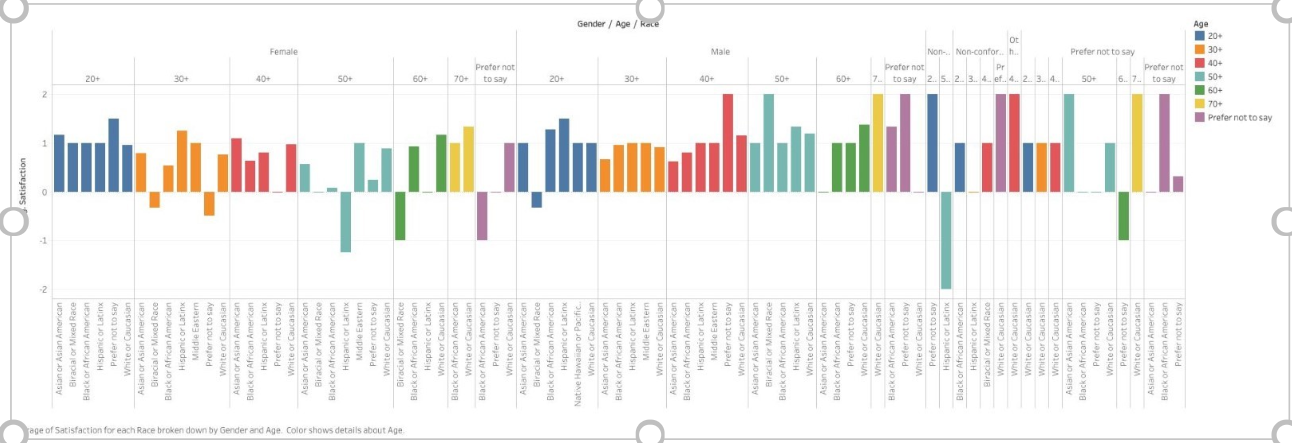

Chart demonstrate interesection in term of race, gender, age

In [32]:
intersect_HIS = pd.DataFrame(combined_file.Description[(combined_file["Race"] == "Hispanic or Latinx") &
                                                    (combined_file["Gender"].isin(["Female","Non-conforming"])) &
                                                    (combined_file["Age"].isin(["50+","60+"]))])
    
    
intersect_BLA = pd.DataFrame(combined_file.Description[(combined_file["Race"] == "Black or African American") &
                                                    (combined_file["Gender"].isin(["Female","Prefer not to say"])) &
                                                    (combined_file["Age"].isin(["50+" "60+", "Prefer not to say"]))])

intersect_BI = pd.DataFrame(combined_file.Description[(combined_file["Race"] == "Biracial or Mixed Race") &
                                                    (combined_file["Gender"] == "Female") &
                                                    (combined_file["Age"].isin(["30+", "50+"]))])

intersect_PRE = pd.DataFrame(combined_file.Description[(combined_file["Race"] == "Prefer not to say") &
                                                    (combined_file["Gender"] == "Female") &
                                                    (combined_file["Age"].isin(["30+","40+", "50+"]))])




demographic_list= [intersect_HIS, intersect_BLA, intersect_BI, intersect_PRE] 
demographic_list

[                                           Description
 351  One of my peers needed help with an exercise t...
 352  When I announced that I preferred to use a dif...
 353  Leader in their quest to develop a subordinate...
 359               Limited opportunities for promotion.
 360  Declined promotion in title even though I was ...
 381  i have felt excluded as a woman where I was th...
 382  sometimes when in a meeting and references are...
 642  When Christmas decorations (poinsettias, wreat...
 643  For much of my time in my department, my group...
 644  Unable to get further ahead in my career path ...
 645  Routinely see other individuals with less expe...
 774  Lower level staff do not get the same work lif...
 775  The supporting staff do not get the same work ...
 776  The supporting staff do not have much room for...
 777  The supporting staff do not get the same work ...,
                                             Description
 1573  I love the job for its purpose that it 

In [25]:
#Adding the index column into the list's dataframes
demographic_list_with_index = []
for data in demographic_list:
    data_text = data[['Description']]
    data_text['index'] = data_text.index
    demographic_list_with_index.append(data_text)

demographic_list_with_index[0]

Description  index
351  One of my peers needed help with an exercise t...    351
352  When I announced that I preferred to use a dif...    352
353  Leader in their quest to develop a subordinate...    353
359               Limited opportunities for promotion.    359
360  Declined promotion in title even though I was ...    360
381  i have felt excluded as a woman where I was th...    381
382  sometimes when in a meeting and references are...    382
642  When Christmas decorations (poinsettias, wreat...    642
643  For much of my time in my department, my group...    643
644  Unable to get further ahead in my career path ...    644
645  Routinely see other individuals with less expe...    645
774  Lower level staff do not get the same work lif...    774
775  The supporting staff do not get the same work ...    775
776  The supporting staff do not have much room for...    776
777  The supporting staff do not get the same work ...    777

In [31]:
#Preprocess the Description text, saving the results as ‘processed_docs’
processed_docs_list = []
for documents in demographic_list_with_index:
    processed_docs = documents['Description'].map(preprocess)
    processed_docs_list.append(processed_docs)

processed_docs_list

[351    [peer, need, help, exercis, certifi, year, exp...
 352    [announc, prefer, differ, font, polici, easier...
 353    [leader, quest, develop, subordin, give, autho...
 359                            [limit, opportun, promot]
 360    [declin, promot, titl, work, better, titl, tim...
 381    [felt, exclud, woman, woman, derogatori, comme...
 382    [meet, refer, sport, feel, exclud, follow, sport]
 642         [christma, decor, poinsettia, wreath, offic]
 643    [time, depart, group, receiv, case, assign, te...
 644                  [unabl, ahead, career, path, indic]
 645                   [routin, individu, experi, promot]
 774    [lower, level, staff, work, life, balanc, comp...
 775    [support, staff, work, life, balanc, compani, ...
 776    [support, staff, room, growth, compani, invest...
 777    [support, staff, work, life, balanc, compani, ...
 Name: Description, dtype: object,
 1573    [love, purpos, serv, kid, employe, staff, unde...
 1574    [ask, member, best, experi,

### BAG OF WORDS approach

In [27]:
#Creating the function for the Bag of Words approach
def LDA_Bags_Of_Words(processed_docs):
    #Create a dictionary (corpora) from ‘processed_docs’ containing the number of times a word appears in the training set.
    dictionary = gensim.corpora.Dictionary(processed_docs)

    #Gensim doc2bow
    #For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


    ### RUNNING LDA USING BAGS OF WORDS 
    # Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=10, workers=2)
                                    #num_topics: Specifying how many topics that we will have
                                    #id2word:  Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
                                    #passes: Number of passes through the corpus during training.
                                    #workers: Number of workers processes to be used for parallelization
    #For each topic, we will explore the words occuring in that topic and its relative weight.
    for idx, topic in lda_model.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(idx, topic))

In [28]:
#Looping through intersecting demographic values 
for i in range(4):
    LDA_Bags_Of_Words(processed_docs_list[i])

2021-06-02 22:40:30,518 - INFO     - adding document #0 to Dictionary(0 unique tokens: [])
2021-06-02 22:40:30,526 - INFO     - built Dictionary(114 unique tokens: ['certifi', 'contractor', 'exercis', 'experi', 'extern']...) from 15 documents (total 206 corpus positions)
2021-06-02 22:40:30,530 - INFO     - using symmetric alpha at 0.3333333333333333
2021-06-02 22:40:30,534 - INFO     - using symmetric eta at 0.3333333333333333
2021-06-02 22:40:30,546 - INFO     - using serial LDA version on this node
2021-06-02 22:40:30,546 - INFO     - running online LDA training, 3 topics, 10 passes over the supplied corpus of 15 documents, updating every 4000 documents, evaluating every ~15 documents, iterating 50x with a convergence threshold of 0.001000
2021-06-02 22:40:30,555 - INFO     - training LDA model using 2 processes
2021-06-02 22:40:30,660 - INFO     - PROGRESS: pass 0, dispatched chunk #0 = documents up to #15/15, outstanding queue size 1
2021-06-02 22:40:32,486 - INFO     - topic #0 (

Topic: 0 
Words: 0.048*"sport" + 0.027*"exclud" + 0.027*"meet" + 0.027*"feel" + 0.027*"refer" + 0.027*"follow" + 0.027*"individu" + 0.027*"routin" + 0.027*"experi" + 0.027*"promot"
Topic: 1 
Words: 0.059*"support" + 0.059*"staff" + 0.042*"compani" + 0.036*"time" + 0.031*"need" + 0.031*"work" + 0.025*"home" + 0.025*"volunt" + 0.025*"day" + 0.019*"font"
Topic: 2 
Words: 0.034*"promot" + 0.034*"work" + 0.034*"titl" + 0.024*"year" + 0.024*"woman" + 0.024*"peer" + 0.014*"experi" + 0.014*"contractor" + 0.014*"certifi" + 0.014*"instead"


2021-06-02 22:40:34,714 - INFO     - topic #0 (0.333): 0.054*"work" + 0.039*"time" + 0.029*"outsid" + 0.029*"employe" + 0.028*"home" + 0.027*"life" + 0.017*"errand" + 0.017*"will" + 0.017*"worri" + 0.017*"teacher"
2021-06-02 22:40:34,716 - INFO     - topic #1 (0.333): 0.033*"input" + 0.032*"meet" + 0.032*"felt" + 0.032*"decis" + 0.020*"employe" + 0.019*"time" + 0.019*"better" + 0.019*"circumst" + 0.019*"classwork" + 0.019*"intent"
2021-06-02 22:40:34,718 - INFO     - topic #2 (0.333): 0.023*"time" + 0.018*"work" + 0.017*"life" + 0.016*"employe" + 0.016*"take" + 0.016*"home" + 0.015*"outsid" + 0.014*"shift" + 0.014*"holiday" + 0.014*"want"
2021-06-02 22:40:34,719 - INFO     - topic diff=1.239427, rho=1.000000
2021-06-02 22:40:34,720 - INFO     - -4.908 per-word bound, 30.0 perplexity estimate based on a held-out corpus of 3 documents with 97 words
2021-06-02 22:40:34,726 - INFO     - PROGRESS: pass 1, dispatched chunk #0 = documents up to #3/3, outstanding queue size 1
2021-06-02 22:40:

Topic: 0 
Words: 0.054*"work" + 0.041*"time" + 0.029*"employe" + 0.029*"outsid" + 0.029*"home" + 0.029*"life" + 0.017*"better" + 0.017*"errand" + 0.017*"will" + 0.017*"worri"
Topic: 1 
Words: 0.033*"meet" + 0.033*"input" + 0.033*"felt" + 0.033*"decis" + 0.019*"circumst" + 0.019*"classwork" + 0.019*"better" + 0.019*"hazard" + 0.019*"use" + 0.019*"love"
Topic: 2 
Words: 0.013*"time" + 0.013*"work" + 0.013*"employe" + 0.013*"life" + 0.013*"take" + 0.013*"home" + 0.013*"outsid" + 0.013*"shift" + 0.013*"holiday" + 0.013*"want"


2021-06-02 22:40:37,331 - INFO     - topic #0 (0.333): 0.037*"work" + 0.026*"tell" + 0.017*"person" + 0.017*"director" + 0.014*"expect" + 0.013*"mix" + 0.013*"experi" + 0.012*"white" + 0.012*"race" + 0.012*"higher"
2021-06-02 22:40:37,332 - INFO     - topic #1 (0.333): 0.035*"work" + 0.016*"includ" + 0.014*"ask" + 0.014*"male" + 0.012*"team" + 0.012*"opinion" + 0.011*"peopl" + 0.011*"skill" + 0.011*"speak" + 0.011*"exclud"
2021-06-02 22:40:37,332 - INFO     - topic #2 (0.333): 0.014*"anti" + 0.014*"involv" + 0.013*"start" + 0.012*"base" + 0.011*"organiz" + 0.011*"friend" + 0.010*"work" + 0.010*"outsid" + 0.010*"experi" + 0.010*"ask"
2021-06-02 22:40:37,335 - INFO     - topic diff=1.219697, rho=1.000000
2021-06-02 22:40:37,375 - INFO     - -5.939 per-word bound, 61.3 perplexity estimate based on a held-out corpus of 25 documents with 359 words
2021-06-02 22:40:37,377 - INFO     - PROGRESS: pass 1, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
2021-06-02 22:40:37

Topic: 0 
Words: 0.038*"work" + 0.029*"tell" + 0.024*"director" + 0.020*"person" + 0.015*"expect" + 0.015*"mix" + 0.015*"race" + 0.015*"task" + 0.015*"associ" + 0.011*"white"
Topic: 1 
Words: 0.031*"work" + 0.021*"male" + 0.016*"includ" + 0.016*"ask" + 0.012*"exclud" + 0.011*"speak" + 0.011*"peopl" + 0.011*"outsid" + 0.011*"opinion" + 0.011*"compani"
Topic: 2 
Words: 0.014*"experi" + 0.014*"start" + 0.014*"anti" + 0.014*"involv" + 0.014*"base" + 0.014*"organiz" + 0.014*"friend" + 0.014*"posit" + 0.014*"pay" + 0.014*"addit"


2021-06-02 22:40:39,891 - INFO     - topic #0 (0.333): 0.027*"speak" + 0.026*"feel" + 0.026*"give" + 0.019*"thing" + 0.019*"joke" + 0.019*"concern" + 0.018*"deni" + 0.014*"need" + 0.014*"experi" + 0.011*"recognit"
2021-06-02 22:40:39,891 - INFO     - topic #1 (0.333): 0.055*"manag" + 0.032*"promot" + 0.023*"direct" + 0.019*"notic" + 0.019*"year" + 0.019*"project" + 0.018*"base" + 0.018*"know" + 0.018*"work" + 0.017*"question"
2021-06-02 22:40:39,894 - INFO     - topic #2 (0.333): 0.032*"meet" + 0.024*"peer" + 0.022*"male" + 0.019*"includ" + 0.019*"discuss" + 0.018*"later" + 0.018*"email" + 0.017*"issu" + 0.017*"inform" + 0.017*"idea"
2021-06-02 22:40:39,898 - INFO     - topic diff=1.553914, rho=1.000000
2021-06-02 22:40:39,920 - INFO     - -5.522 per-word bound, 46.0 perplexity estimate based on a held-out corpus of 26 documents with 222 words
2021-06-02 22:40:39,922 - INFO     - PROGRESS: pass 1, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
2021-06-02 22:40:3

Topic: 0 
Words: 0.028*"speak" + 0.028*"feel" + 0.028*"give" + 0.020*"thing" + 0.020*"joke" + 0.020*"concern" + 0.020*"deni" + 0.012*"recognit" + 0.011*"skill" + 0.011*"equal"
Topic: 1 
Words: 0.057*"manag" + 0.033*"promot" + 0.026*"direct" + 0.018*"work" + 0.018*"notic" + 0.018*"year" + 0.018*"situat" + 0.018*"know" + 0.018*"question" + 0.018*"base"
Topic: 2 
Words: 0.033*"meet" + 0.026*"peer" + 0.026*"male" + 0.018*"experi" + 0.018*"includ" + 0.018*"later" + 0.018*"discuss" + 0.018*"email" + 0.018*"issu" + 0.018*"inform"


### TF-IDF approach

In [29]:
#Creating the function for theTF-IDF approach
def TF_IDF(processed_docs):
    #Create a dictionary (corpora) from ‘processed_docs’ containing the number of times a word appears in the training set.
    dictionary = gensim.corpora.Dictionary(processed_docs)

    #Gensim doc2bow
    #For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

    
    # Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.
    from gensim import corpora, models

    tfidf = models.TfidfModel(bow_corpus)
    corpus_tfidf = tfidf[bow_corpus]
    
    
    
    ### Running LDA using TF-IDF
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=3, 
                                             id2word=dictionary, 
                                             passes=10, workers=2)

    for idx, topic in lda_model_tfidf.print_topics(-1):
        print('Topic: {} Word: {}'.format(idx, topic))

In [30]:
#Looping through intersecting demographic values 
for i in range(4):
    TF_IDF(processed_docs_list[i])

2021-06-02 22:40:40,435 - INFO     - adding document #0 to Dictionary(0 unique tokens: [])
2021-06-02 22:40:40,437 - INFO     - built Dictionary(114 unique tokens: ['certifi', 'contractor', 'exercis', 'experi', 'extern']...) from 15 documents (total 206 corpus positions)
2021-06-02 22:40:40,439 - INFO     - collecting document frequencies
2021-06-02 22:40:40,441 - INFO     - PROGRESS: processing document #0
2021-06-02 22:40:40,444 - INFO     - calculating IDF weights for 15 documents and 114 features (158 matrix non-zeros)
2021-06-02 22:40:40,447 - INFO     - using symmetric alpha at 0.3333333333333333
2021-06-02 22:40:40,449 - INFO     - using symmetric eta at 0.3333333333333333
2021-06-02 22:40:40,451 - INFO     - using serial LDA version on this node
2021-06-02 22:40:40,452 - INFO     - running online LDA training, 3 topics, 10 passes over the supplied corpus of 15 documents, updating every 4000 documents, evaluating every ~15 documents, iterating 50x with a convergence threshold of

Topic: 0 Word: 0.021*"experi" + 0.019*"routin" + 0.019*"individu" + 0.015*"differ" + 0.015*"font" + 0.014*"promot" + 0.014*"certifi" + 0.014*"exercis" + 0.014*"instead" + 0.014*"hire"
Topic: 1 Word: 0.021*"titl" + 0.020*"sport" + 0.018*"receiv" + 0.018*"group" + 0.017*"woman" + 0.015*"exclud" + 0.013*"refer" + 0.013*"follow" + 0.013*"meet" + 0.013*"feel"
Topic: 2 Word: 0.028*"staff" + 0.021*"support" + 0.020*"compani" + 0.018*"day" + 0.018*"home" + 0.018*"volunt" + 0.017*"life" + 0.017*"balanc" + 0.017*"work" + 0.017*"level"


2021-06-02 22:40:45,631 - INFO     - topic #0 (0.333): 0.025*"work" + 0.017*"outsid" + 0.017*"home" + 0.017*"life" + 0.014*"time" + 0.014*"feel" + 0.014*"supervisor" + 0.014*"will" + 0.014*"set" + 0.014*"director"
2021-06-02 22:40:45,632 - INFO     - topic #1 (0.333): 0.025*"input" + 0.025*"felt" + 0.025*"decis" + 0.018*"final" + 0.018*"intent" + 0.018*"major" + 0.018*"formal" + 0.018*"peer" + 0.018*"solicit" + 0.018*"depart"
2021-06-02 22:40:45,634 - INFO     - topic #2 (0.333): 0.021*"meet" + 0.016*"everyday" + 0.016*"train" + 0.016*"versus" + 0.016*"addit" + 0.016*"hazard" + 0.016*"classwork" + 0.016*"staff" + 0.016*"help" + 0.016*"covid"
2021-06-02 22:40:45,637 - INFO     - topic diff=1.348955, rho=1.000000
2021-06-02 22:40:45,642 - INFO     - -6.162 per-word bound, 71.6 perplexity estimate based on a held-out corpus of 3 documents with 14 words
2021-06-02 22:40:45,645 - INFO     - PROGRESS: pass 1, dispatched chunk #0 = documents up to #3/3, outstanding queue size 1
2021-06-02 22:

Topic: 0 Word: 0.025*"work" + 0.018*"outsid" + 0.018*"home" + 0.018*"life" + 0.014*"time" + 0.014*"feel" + 0.014*"supervisor" + 0.014*"will" + 0.014*"set" + 0.014*"director"
Topic: 1 Word: 0.026*"input" + 0.026*"felt" + 0.026*"decis" + 0.019*"final" + 0.019*"intent" + 0.019*"formal" + 0.019*"major" + 0.019*"peer" + 0.019*"solicit" + 0.019*"depart"
Topic: 2 Word: 0.022*"meet" + 0.016*"everyday" + 0.016*"train" + 0.016*"versus" + 0.016*"addit" + 0.016*"hazard" + 0.016*"classwork" + 0.016*"staff" + 0.016*"help" + 0.016*"covid"


2021-06-02 22:40:47,996 - INFO     - topic #0 (0.333): 0.010*"skill" + 0.009*"higher" + 0.009*"categori" + 0.009*"male" + 0.008*"make" + 0.007*"person" + 0.007*"tell" + 0.007*"work" + 0.007*"concern" + 0.007*"direct"
2021-06-02 22:40:47,997 - INFO     - topic #1 (0.333): 0.010*"consid" + 0.009*"subject" + 0.009*"ask" + 0.008*"disregard" + 0.008*"project" + 0.008*"anti" + 0.008*"involv" + 0.008*"creat" + 0.008*"affect" + 0.008*"boss"
2021-06-02 22:40:47,998 - INFO     - topic #2 (0.333): 0.010*"director" + 0.010*"work" + 0.008*"opportun" + 0.008*"expect" + 0.008*"organ" + 0.008*"time" + 0.008*"addit" + 0.008*"explor" + 0.007*"help" + 0.007*"peopl"
2021-06-02 22:40:48,001 - INFO     - topic diff=1.215783, rho=1.000000
2021-06-02 22:40:48,031 - INFO     - -7.100 per-word bound, 137.2 perplexity estimate based on a held-out corpus of 25 documents with 83 words
2021-06-02 22:40:48,034 - INFO     - PROGRESS: pass 1, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
2021-

Topic: 0 Word: 0.010*"skill" + 0.010*"higher" + 0.009*"categori" + 0.009*"male" + 0.008*"make" + 0.007*"direct" + 0.007*"concern" + 0.007*"work" + 0.007*"felt" + 0.007*"person"
Topic: 1 Word: 0.011*"consid" + 0.010*"subject" + 0.009*"ask" + 0.009*"disregard" + 0.009*"project" + 0.009*"convers" + 0.009*"expert" + 0.008*"creat" + 0.008*"boss" + 0.008*"anti"
Topic: 2 Word: 0.011*"director" + 0.010*"work" + 0.009*"organ" + 0.009*"opportun" + 0.009*"demonstr" + 0.009*"expect" + 0.008*"peopl" + 0.008*"time" + 0.008*"explor" + 0.008*"addit"


2021-06-02 22:40:50,654 - INFO     - topic #0 (0.333): 0.017*"recognit" + 0.015*"base" + 0.014*"skill" + 0.014*"project" + 0.013*"know" + 0.013*"equal" + 0.012*"recogn" + 0.011*"particip" + 0.011*"workload" + 0.011*"accomplish"
2021-06-02 22:40:50,655 - INFO     - topic #1 (0.333): 0.014*"underpay" + 0.014*"manag" + 0.013*"hard" + 0.012*"educ" + 0.012*"promot" + 0.012*"give" + 0.012*"work" + 0.011*"voic" + 0.011*"idea" + 0.011*"peer"
2021-06-02 22:40:50,655 - INFO     - topic #2 (0.333): 0.012*"feel" + 0.012*"speak" + 0.011*"experi" + 0.010*"like" + 0.010*"lash" + 0.010*"slide" + 0.010*"futur" + 0.010*"challeng" + 0.010*"crazi" + 0.010*"make"
2021-06-02 22:40:50,659 - INFO     - topic diff=1.216952, rho=1.000000
2021-06-02 22:40:50,674 - INFO     - -6.662 per-word bound, 101.3 perplexity estimate based on a held-out corpus of 26 documents with 66 words
2021-06-02 22:40:50,682 - INFO     - PROGRESS: pass 1, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
2021-06-0

Topic: 0 Word: 0.018*"recognit" + 0.016*"skill" + 0.016*"base" + 0.015*"project" + 0.013*"know" + 0.013*"equal" + 0.012*"recogn" + 0.012*"workload" + 0.012*"particip" + 0.012*"give"
Topic: 1 Word: 0.018*"underpay" + 0.015*"manag" + 0.014*"hard" + 0.013*"educ" + 0.013*"promot" + 0.012*"work" + 0.012*"voic" + 0.012*"idea" + 0.011*"peer" + 0.011*"notic"
Topic: 2 Word: 0.013*"feel" + 0.013*"speak" + 0.011*"demot" + 0.011*"lose" + 0.011*"voiceless" + 0.011*"repercuss" + 0.011*"experi" + 0.011*"like" + 0.011*"lash" + 0.011*"slide"


##  In trying to understand how employees participate, on average how many experiences of exclusion do various groups tend to share? Who shares the most? What are the commonalities that exist in who participates the least or the most?


##  Is there a clear correlation between level of satisfaction and number of experiences of exclusion?


##  What are the most common experiences of exclusion that can be linked to the lowest levels of satisfaction? Are there types of experiences that are impacting satisfaction more significantly?